## Final Project Submission

Please fill out:
* Student name: Boniface Mutwiri, Dorothy Awino, Luwate Inda, Julius Wakaba, Tracy Otieno
* Student pace: full time
* Instructor name: Mwikali


# Overview
Like many other industries, the movie industry was feared to fail in the midst of the global pandemic that gripped the world in 2020. While 2020 and 2021 proved to be especially tricky years for the industry, it has since recovered to pre-2020 levels and is expected to continue to grow strongly throughout the rest of the decade. Therefore, it would be prudent to investigate the viability of creating a new studio, which would not only contribute to the increased market capitalisation of the industry but more importantly, would allow more original stories to be told.

G2 corp. has been successful in the various ventures that it has had a stake in, however this does not guarantee success in its future ventures. Thus it is vital to conduct analysis to help determine what type of movies, targeted at which markets and produced by which director in order to maximise the chance of success.

# DATA PREPARATION

### Importing Python libraries commonly used for data manipulation, numerical computations, and data visualization. We will be using then with our data set

In [157]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
import sqlite3
from scipy import stats

### Importing the  1st csv file using pandas inorder to enable looking into the data

In [158]:
df= pd.read_csv('data/bom.movie_gross.csv')
df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Importing the  2nd csv file using pandas inorder to enable looking into the data

In [159]:
# Load data from tmdb
df_1 = pd.read_csv('data/tmdb.movies.csv')
df_1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### Importing the  3rd csv file using pandas inorder to enable looking into the data

In [160]:
df_2= pd.read_csv('data/tn.movie_budgets.csv')
df_2


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Looking into the Sqlite database inorder to enable looking into the data

In [161]:
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print(tables)

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


Below, all the movie_basics data is querried from the database in addition to the data about movie ratings and the writers

In [162]:
df_3 = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id) 
JOIN writers
USING(movie_id) 
""",conn)
print(df_3)

         movie_id               primary_title              original_title  \
0       tt0063540                   Sunghursh                   Sunghursh   
1       tt0063540                   Sunghursh                   Sunghursh   
2       tt0063540                   Sunghursh                   Sunghursh   
3       tt0063540                   Sunghursh                   Sunghursh   
4       tt0069049  The Other Side of the Wind  The Other Side of the Wind   
...           ...                         ...                         ...   
169298  tt9914286           Sokagin Çocuklari           Sokagin Çocuklari   
169299  tt9914642                   Albatross                   Albatross   
169300  tt9914642                   Albatross                   Albatross   
169301  tt9914942  La vida sense la Sara Amat  La vida sense la Sara Amat   
169302  tt9914942  La vida sense la Sara Amat  La vida sense la Sara Amat   

        start_year  runtime_minutes              genres  averagerating  \
0

In [163]:
df_3

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0347899
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm1194313
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm1391276
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,nm0000080
...,...,...,...,...,...,...,...,...,...
169298,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,nm4394529
169299,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859
169300,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm7332227
169301,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm3678448


Below we query data about the directors of each movie from the database

In [164]:
df_temp = pd.read_sql("""
SELECT DISTINCT movie_id, region, language, primary_name, death_year
FROM movie_basics
JOIN directors
USING(movie_id) 
JOIN persons
USING (person_id)
JOIN movie_akas
USING(movie_id)
""",conn)
print(df_temp)

         movie_id region language         primary_name  death_year
0       tt0063540   None     None  Harnam Singh Rawail      2004.0
1       tt0063540     IN     None  Harnam Singh Rawail      2004.0
2       tt0063540     IN       hi  Harnam Singh Rawail      2004.0
3       tt0066787   None     None            Mani Kaul      2011.0
4       tt0066787     IN     None            Mani Kaul      2011.0
...           ...    ...      ...                  ...         ...
352470  tt9915436   None     None    Eduardo Rajabally         NaN
352471  tt9915436     US     None    Eduardo Rajabally         NaN
352472  tt9916170   None     None      Tamar Guimaraes         NaN
352473  tt9916170     BR     None      Tamar Guimaraes         NaN
352474  tt9916170    XWW       en      Tamar Guimaraes         NaN

[352475 rows x 5 columns]


Below, we query the data about writers from the database and store it in a temporary dataframe

In [165]:
df_temp2 = pd.read_sql("""
SELECT DISTINCT movie_id, primary_name as writer
FROM movie_basics
JOIN writers
USING(movie_id) 
JOIN persons
USING (person_id)
""",conn)
print(df_temp2)

         movie_id                  writer
0       tt0063540              Abrar Alvi
1       tt0063540                  Gulzar
2       tt0063540          Mahasweta Devi
3       tt0063540           Anjana Rawail
4       tt0069049            Orson Welles
...           ...                     ...
178103  tt9916622   Ana Célia de Oliveira
178104  tt9916706        Dr. Sudhir Nikam
178105  tt9916730            Kiran Gawade
178106  tt9916754  Vinicius Augusto Bozzo
178107  tt9916754           Angela Gurgel

[178108 rows x 2 columns]


The data about directors and writers is then merged together below

In [166]:
df_temp = df_temp.merge(df_temp2, how='left', on='movie_id')

In [167]:
df_temp

,movie_id,region,language,primary_name,death_year,writer
0,tt0063540,None,None,Harnam Singh Rawail,2004.0,Abrar Alvi
1,tt0063540,None,None,Harnam Singh Rawail,2004.0,Gulzar
2,tt0063540,None,None,Harnam Singh Rawail,2004.0,Mahasweta Devi
3,tt0063540,None,None,Harnam Singh Rawail,2004.0,Anjana Rawail
4,tt0063540,IN,None,Harnam Singh Rawail,2004.0,Abrar Alvi
...,...,...,...,...,...,...
768307,tt9916170,BR,None,Tamar Guimaraes,NaN,Tamar Guimaraes
768308,tt9916170,BR,None,Tamar Guimaraes,NaN,Lillah Halla
768309,tt9916170,XWW,en,Tamar Guimaraes,NaN,Melissa de Raaf
768310,tt9916170,XWW,en,Tamar Guimaraes,NaN,Tamar Guimaraes


The merged director/writer data is then merged with the rest of the data from the database enabling understanding of the writers and directors for each movie.

In [168]:
df_3 = df_3.merge(df_temp, how= 'inner', on='movie_id')

In [169]:
#df_10

In [170]:
df_3

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,region,language,primary_name,death_year,writer
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,Harnam Singh Rawail,2004.0,Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,Harnam Singh Rawail,2004.0,Gulzar
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,Harnam Singh Rawail,2004.0,Mahasweta Devi
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,Harnam Singh Rawail,2004.0,Anjana Rawail
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,IN,None,Harnam Singh Rawail,2004.0,Abrar Alvi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75629116,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,None,Vineesh Aaradya,NaN,Anooja Kozhikode
75629117,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,None,Vineesh Aaradya,NaN,Thankayam Sasikumar
75629118,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,ml,Vineesh Aaradya,NaN,Vineesh Aaradya
75629119,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,ml,Vineesh Aaradya,NaN,Anooja Kozhikode


In [171]:
df_3.duplicated().sum()

np.int64(71745438)

In [172]:
df_3.drop_duplicates(inplace=True)

### Joining the dataframes 

In [173]:
joined_data = df_3.copy()

Below, the IMDB data is being merged with the tmdb data. The title of the movie is used as the common key

In [174]:
joined_data.merge(df_1, how = 'left', left_on = 'primary_title', right_on = 'title')
joined_data = joined_data.merge(df_1, how='left', left_on='primary_title', right_on='title')


In [175]:
joined_data

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,region,...,Unnamed: 0,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059853,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4059854,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4059855,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4059856,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
df_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [177]:
df_2['production_budget'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Name: production_budget, Length: 5782, dtype: bool

The merged IMDB/tmdb data is then merged with budget figures from the numbers

In [178]:
joined_data = joined_data.merge(df_2, how='left', left_on='primary_title', right_on='movie')


In [179]:
joined_data

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,region,...,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087842,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087843,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087844,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4087845,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
df = df.set_index('title')
df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [181]:
joined_data =joined_data.set_index('primary_title')
joined_data

,movie_id,original_title_x,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,region,language,...,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
primary_title,,,,,,,,,,,,,,,,,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0023551,IN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Padmavyuhathile Abhimanyu,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Padmavyuhathile Abhimanyu,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Padmavyuhathile Abhimanyu,tt9911774,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,nm10536454,IN,ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below, we use combine_first to fill any missing values of foreign/domestic_gross using data from box office mojo

In [182]:
joined_data = joined_data.combine_first(df)

In [183]:
joined_data =joined_data.reset_index()
joined_data =joined_data.rename(columns ={'index':'primary_title'})
joined_data


,primary_title,Unnamed: 0,averagerating,death_year,domestic_gross,foreign_gross,genre_ids,genres,id_x,id_y,...,release_date_y,runtime_minutes,start_year,studio,title,vote_average,vote_count,worldwide_gross,writer,year
0,#1 Serial Killer,NaN,5.6,NaN,NaN,NaN,NaN,Horror,NaN,NaN,...,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
1,#1 Serial Killer,NaN,5.6,NaN,NaN,NaN,NaN,Horror,NaN,NaN,...,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
2,#5,NaN,6.8,NaN,NaN,NaN,NaN,"Biography,Comedy,Fantasy",NaN,NaN,...,NaN,68.0,2013.0,NaN,NaN,NaN,NaN,NaN,Ricky Bardy,NaN
3,#66,NaN,5.3,NaN,NaN,NaN,NaN,Action,NaN,NaN,...,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,NaN,Asun Mawardi,NaN
4,#66,NaN,5.3,NaN,NaN,NaN,NaN,Action,NaN,NaN,...,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,NaN,Matthew Ryan Fischer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088706,ärtico,NaN,6.6,NaN,NaN,NaN,NaN,Drama,NaN,NaN,...,NaN,78.0,2014.0,NaN,NaN,NaN,NaN,NaN,Carlos Unamuno,NaN
4088707,Šiška Deluxe,NaN,6.3,NaN,NaN,NaN,NaN,"Comedy,Drama",NaN,NaN,...,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088708,Šiška Deluxe,NaN,6.3,NaN,NaN,NaN,NaN,"Comedy,Drama",NaN,NaN,...,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088709,Šiška Deluxe,NaN,6.3,NaN,NaN,NaN,NaN,"Comedy,Drama",NaN,NaN,...,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN


In [184]:
joined_data[joined_data['primary_title']=='Toy Story 3']

,primary_title,Unnamed: 0,averagerating,death_year,domestic_gross,foreign_gross,genre_ids,genres,id_x,id_y,...,release_date_y,runtime_minutes,start_year,studio,title,vote_average,vote_count,worldwide_gross,writer,year
3581047,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Andrew Stanton,2010.0
3581048,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",John Lasseter,2010.0
3581049,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Lee Unkrich,2010.0
3581050,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Michael Arndt,2010.0
3581051,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Andrew Stanton,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581586,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Michael Arndt,2010.0
3581587,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Andrew Stanton,2010.0
3581588,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",John Lasseter,2010.0
3581589,Toy Story 3,7.0,8.3,NaN,"$415,004,880",652000000,"[16, 10751, 35]","Adventure,Animation,Comedy",10193.0,47.0,...,"Jun 18, 2010",103.0,2010.0,BV,Toy Story 3,7.7,8340.0,"$1,068,879,522",Lee Unkrich,2010.0


Below we remove the $ symbols and commas from the financial data

In [185]:
columns_to_clean = ['domestic_gross', 'foreign_gross', 'worldwide_gross', 'production_budget']
for col in columns_to_clean:
    joined_data[col] = (
        joined_data[col]
        .replace('[\$,]', '', regex=True)  
        .astype(float)  
    )

In [186]:
joined_data.shape

(4088711, 33)

In [187]:
joined_data.columns


Index(['primary_title', 'Unnamed: 0', 'averagerating', 'death_year',
       'domestic_gross', 'foreign_gross', 'genre_ids', 'genres', 'id_x',
       'id_y', 'language', 'movie', 'movie_id', 'numvotes',
       'original_language', 'original_title_x', 'original_title_y',
       'person_id', 'popularity', 'primary_name', 'production_budget',
       'region', 'release_date_x', 'release_date_y', 'runtime_minutes',
       'start_year', 'studio', 'title', 'vote_average', 'vote_count',
       'worldwide_gross', 'writer', 'year'],
      dtype='object')

### Columns to be dropped

In [188]:
columns_to_drop = ['id_x','id_y','original_title_y','original_title_x','release_date_y','genre_ids','title','movie','Unnamed: 0']
joined_data.drop(columns=columns_to_drop, inplace=True)


In [189]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088711 entries, 0 to 4088710
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   primary_title      object 
 1   averagerating      float64
 2   death_year         float64
 3   domestic_gross     float64
 4   foreign_gross      float64
 5   genres             object 
 6   language           object 
 7   movie_id           object 
 8   numvotes           float64
 9   original_language  object 
 10  person_id          object 
 11  popularity         float64
 12  primary_name       object 
 13  production_budget  float64
 14  region             object 
 15  release_date_x     object 
 16  runtime_minutes    float64
 17  start_year         float64
 18  studio             object 
 19  vote_average       float64
 20  vote_count         float64
 21  worldwide_gross    float64
 22  writer             object 
 23  year               float64
dtypes: float64(13), object(11)
memory usage: 748.7+ MB

# DATA CLEANING

### The percentage of missing values in the dataframe

In [190]:
missing_percentage =joined_data.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.020936
death_year           99.387973
domestic_gross       74.563695
foreign_gross        82.676765
genres                0.155208
language             87.365040
movie_id              0.020936
numvotes              0.020936
original_language    44.331526
person_id             0.020936
popularity           44.331526
primary_name          0.020936
production_budget    80.674961
region               12.687911
release_date_x       44.331526
runtime_minutes       2.802228
start_year            0.020936
studio               78.650851
vote_average         44.331526
vote_count           44.331526
worldwide_gross      80.674961
writer                0.020936
year                 78.649775
dtype: float64

### Viewing the columns with the most missing values

In [191]:
columns_high_missing = missing_percentage[missing_percentage > 50]
print(columns_high_missing)

death_year           99.387973
domestic_gross       74.563695
foreign_gross        82.676765
language             87.365040
production_budget    80.674961
studio               78.650851
worldwide_gross      80.674961
year                 78.649775
dtype: float64


### Finding the duplicate in the data set

In [192]:
joined_data.duplicated().sum()

np.int64(82779)

Dropping duplicated values in the dataset

In [193]:
#checking if we have duplicated values in our dataset
joined_data.drop_duplicates(inplace=True)

### Descriptive statistics for numerical columns in a DataFrame, including metrics like count, mean, standard deviation, minimum, maximum, and quartiles

In [194]:
joined_data.describe()

,averagerating,death_year,domestic_gross,foreign_gross,numvotes,popularity,production_budget,runtime_minutes,start_year,vote_average,vote_count,worldwide_gross,year
count,4.005076e+06,24855.000000,9.777310e+05,6.595690e+05,4.005076e+06,2.193344e+06,7.408050e+05,3.891492e+06,4.005076e+06,2.193344e+06,2.193344e+06,7.408050e+05,813120.000000
mean,5.954797e+00,2015.674552,8.881263e+07,1.701629e+08,3.799610e+04,8.942504e+00,7.408576e+07,1.073702e+02,2.014140e+03,5.589703e+00,1.227286e+03,2.911948e+08,2014.057614
std,1.117393e+00,3.006661,1.300629e+08,2.090250e+08,1.101587e+05,9.536654e+00,7.601173e+07,2.322829e+01,2.279250e+00,1.165272e+00,2.729816e+03,3.802712e+08,2.258931
min,1.000000e+00,1944.000000,0.000000e+00,6.000000e+02,5.000000e+00,6.000000e-01,1.400000e+03,4.000000e+00,2.010000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2010.000000
25%,5.200000e+00,2014.000000,2.400000e+06,2.360000e+07,8.900000e+01,2.262000e+00,1.000000e+07,9.200000e+01,2.012000e+03,4.800000e+00,1.400000e+01,3.116475e+07,2013.000000
50%,5.900000e+00,2016.000000,2.606896e+07,5.260000e+07,7.010000e+02,7.571000e+00,4.000000e+07,1.010000e+02,2.014000e+03,5.200000e+00,1.480000e+02,1.119463e+08,2014.000000
75%,6.800000e+00,2018.000000,1.234776e+08,2.897000e+08,1.072900e+04,1.208000e+01,1.350000e+08,1.250000e+02,2.016000e+03,6.500000e+00,1.104000e+03,4.577294e+08,2016.000000
max,1.000000e+01,2019.000000,9.367000e+08,9.605000e+08,1.841066e+06,8.077300e+01,4.250000e+08,1.440000e+03,2.019000e+03,1.000000e+01,2.218600e+04,2.776345e+09,2018.000000


### Descriptive statistics for categorical columns in a DataFrame, including metrics like count, unique, to and freq

In [195]:
joined_data.describe(include= ['object'])

,primary_title,genres,language,movie_id,original_language,person_id,primary_name,region,release_date_x,studio,writer
count,4005932,3999586,505472,4005076,2193344,4005076,4005076,3493324,2193344,813076,4005076
unique,57823,889,75,60054,67,73278,47312,190,2819,257,72561
top,ABCs of Death 2,"Comedy,Horror",en,tt2926810,en,nm0863807,James Gunn,US,2014-10-02,Rela.,Ant Timpson
freq,303831,475158,225660,303831,1935195,15687,21443,814065,303871,144955,15687


# HANDLING MISSING VALUES ON CONTINOUS DATA

### Filling in the missing values of the continuos data with the median 

#### Confirmantion that the continous data has been filled by the median

In [196]:
missing_percentage =joined_data.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.021368
death_year           99.379545
domestic_gross       75.592921
foreign_gross        83.535192
genres                0.158415
language             87.381913
movie_id              0.021368
numvotes              0.021368
original_language    45.247598
person_id             0.021368
popularity           45.247598
primary_name          0.021368
production_budget    81.507300
region               12.796223
release_date_x       45.247598
runtime_minutes       2.856763
start_year            0.021368
studio               79.703200
vote_average         45.247598
vote_count           45.247598
worldwide_gross      81.507300
writer                0.021368
year                 79.702102
dtype: float64

### The plot of the continous data shows the correlation between each variable with the other

In [ ]:
correlation_matrix = joined_data.corr(numeric_only=True)

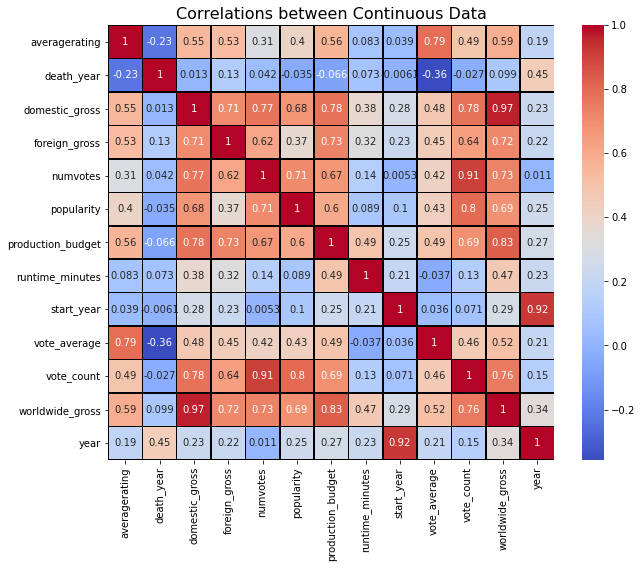

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlations between Continuous Data', fontsize=16)
plt.show()

# HANDLING MISSING VALUES ON CATEGORICAL DATA

### Filling in categorical data is important in data analysis since it improves the model performance,information preservation,data integrity and consistability and Improved visualization

### Confirmation that the missing categorical data has been filled in

In [101]:
missing_percentage =joined_data.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.021368
death_year           99.379545
domestic_gross       75.592921
foreign_gross        83.535192
genres                0.158415
language             87.381913
movie_id              0.021368
numvotes              0.021368
original_language    45.247598
person_id             0.021368
popularity           45.247598
primary_name          0.021368
production_budget    81.507300
region               12.796223
release_date_x       45.247598
runtime_minutes       2.856763
start_year            0.021368
studio               79.703200
vote_average         45.247598
vote_count           45.247598
worldwide_gross      81.507300
writer                0.021368
year                 79.702102
dtype: float64

Quick clean

In [198]:
missing_percentage =joined_data.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.021368
death_year           99.379545
domestic_gross       75.592921
foreign_gross        83.535192
genres                0.158415
language             87.381913
movie_id              0.021368
numvotes              0.021368
original_language    45.247598
person_id             0.021368
popularity           45.247598
primary_name          0.021368
production_budget    81.507300
region               12.796223
release_date_x       45.247598
runtime_minutes       2.856763
start_year            0.021368
studio               79.703200
vote_average         45.247598
vote_count           45.247598
worldwide_gross      81.507300
writer                0.021368
year                 79.702102
dtype: float64

Check for duplicates and drop any if there are

In [199]:
joined_data.duplicated().sum()

np.int64(0)

In [200]:
joined_data.drop_duplicates(inplace=True)

In [201]:
joined_data

,primary_title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date_x,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
0,#1 Serial Killer,5.6,NaN,NaN,NaN,Horror,None,tt2346170,40.0,NaN,...,None,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
1,#1 Serial Killer,5.6,NaN,NaN,NaN,Horror,None,tt2346170,40.0,NaN,...,US,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
2,#5,6.8,NaN,NaN,NaN,"Biography,Comedy,Fantasy",None,tt3120962,6.0,NaN,...,US,NaN,68.0,2013.0,NaN,NaN,NaN,NaN,Ricky Bardy,NaN
3,#66,5.3,NaN,NaN,NaN,Action,None,tt5255986,18.0,NaN,...,ID,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,Asun Mawardi,NaN
4,#66,5.3,NaN,NaN,NaN,Action,None,tt5255986,18.0,NaN,...,ID,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,Matthew Ryan Fischer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088706,ärtico,6.6,NaN,NaN,NaN,Drama,None,tt3509772,101.0,NaN,...,SE,NaN,78.0,2014.0,NaN,NaN,NaN,NaN,Carlos Unamuno,NaN
4088707,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,None,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088708,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,RS,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088709,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,SI,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN


We first drop any null values in the colunns without the necessary financial data as the lack of this data makes it difficult to understand how the movies performed

In [202]:
df_cleaned = joined_data.copy()
df_cleaned.dropna(subset=['foreign_gross', 'domestic_gross', 'worldwide_gross'], inplace=True)

In [203]:
df_cleaned

,primary_title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date_x,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
22262,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,None,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22263,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,None,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
22264,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,None,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Damien Chazelle,2016.0
22265,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,AR,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22266,10 Cloverfield Lane,7.2,NaN,72082999.0,38100000.0,"Drama,Horror,Mystery",None,tt1179933,260383.0,en,...,AR,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085517,Zootopia,8.0,NaN,341268248.0,682500000.0,"Adventure,Animation,Comedy",None,tt2948356,383446.0,en,...,VN,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Kellie D. Lewis,2016.0
4085518,Zootopia,8.0,NaN,341268248.0,682500000.0,"Adventure,Animation,Comedy",None,tt2948356,383446.0,en,...,VN,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jared Bush,2016.0
4085519,Zootopia,8.0,NaN,341268248.0,682500000.0,"Adventure,Animation,Comedy",None,tt2948356,383446.0,en,...,VN,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jennifer Lee,2016.0
4085520,Zootopia,8.0,NaN,341268248.0,682500000.0,"Adventure,Animation,Comedy",None,tt2948356,383446.0,en,...,VN,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Phil Johnston,2016.0


In [204]:
missing_percentage =df_cleaned.isnull().mean() * 100
missing_percentage

primary_title         0.000000
averagerating         0.000000
death_year           99.796583
domestic_gross        0.000000
foreign_gross         0.000000
genres                0.001626
language             83.665045
movie_id              0.000000
numvotes              0.000000
original_language     0.218050
person_id             0.000000
popularity            0.218050
primary_name          0.000000
production_budget     0.000000
region                3.788685
release_date_x        0.218050
runtime_minutes       0.061964
start_year            0.000000
studio                0.000000
vote_average          0.218050
vote_count            0.218050
worldwide_gross       0.000000
writer                0.000000
year                  0.000000
dtype: float64

-1 is then impute into the colunmn death year it is blank. This assumes a null value means that the individual is still alive 

In [205]:
df_cleaned['death_year'].fillna(-1, inplace=True)

/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_2139/4038691889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['death_year'].fillna(-1, inplace=True)


In [206]:
df_cleaned.isnull().mean() * 100

primary_title         0.000000
averagerating         0.000000
death_year            0.000000
domestic_gross        0.000000
foreign_gross         0.000000
genres                0.001626
language             83.665045
movie_id              0.000000
numvotes              0.000000
original_language     0.218050
person_id             0.000000
popularity            0.218050
primary_name          0.000000
production_budget     0.000000
region                3.788685
release_date_x        0.218050
runtime_minutes       0.061964
start_year            0.000000
studio                0.000000
vote_average          0.218050
vote_count            0.218050
worldwide_gross       0.000000
writer                0.000000
year                  0.000000
dtype: float64

As only 0.2% of movies have missing values for original language, we impute "Unknown". The same is done for region which has a slightly higher missing value count.
As for runtime_minutes, the data seems to be generally normal, thus we impute the mean for missing values 

In [207]:
df_cleaned['original_language'].fillna("Unknown", inplace=True)
df_cleaned['region'].fillna("Unknown", inplace=True)
df_cleaned['runtime_minutes'].fillna(df_cleaned['runtime_minutes'].mean(), inplace=True)

/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_2139/3399059270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['original_language'].fillna("Unknown", inplace=True)
/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_2139/3399059270.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [208]:
df_cleaned.isnull().mean() * 100

primary_title         0.000000
averagerating         0.000000
death_year            0.000000
domestic_gross        0.000000
foreign_gross         0.000000
genres                0.001626
language             83.665045
movie_id              0.000000
numvotes              0.000000
original_language     0.000000
person_id             0.000000
popularity            0.218050
primary_name          0.000000
production_budget     0.000000
region                0.000000
release_date_x        0.218050
runtime_minutes       0.000000
start_year            0.000000
studio                0.000000
vote_average          0.218050
vote_count            0.218050
worldwide_gross       0.000000
writer                0.000000
year                  0.000000
dtype: float64

The remaining missing values are dropped

In [209]:
df_cleaned.dropna(axis=0, inplace=True)

In [210]:
df_cleaned.isnull().mean() * 100

primary_title        0.0
averagerating        0.0
death_year           0.0
domestic_gross       0.0
foreign_gross        0.0
genres               0.0
language             0.0
movie_id             0.0
numvotes             0.0
original_language    0.0
person_id            0.0
popularity           0.0
primary_name         0.0
production_budget    0.0
region               0.0
release_date_x       0.0
runtime_minutes      0.0
start_year           0.0
studio               0.0
vote_average         0.0
vote_count           0.0
worldwide_gross      0.0
writer               0.0
year                 0.0
dtype: float64

In [211]:
df_cleaned.duplicated().sum()

np.int64(0)

In [212]:
df_cleaned

,primary_title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date_x,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
22268,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22269,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
22270,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Damien Chazelle,2016.0
22274,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",fr,tt1179933,260383.0,en,...,CA,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22275,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",fr,tt1179933,260383.0,en,...,CA,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085477,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Kellie D. Lewis,2016.0
4085478,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jared Bush,2016.0
4085479,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jennifer Lee,2016.0
4085480,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Phil Johnston,2016.0


In [213]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90313 entries, 22268 to 4085481
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      90313 non-null  object 
 1   averagerating      90313 non-null  float64
 2   death_year         90313 non-null  float64
 3   domestic_gross     90313 non-null  float64
 4   foreign_gross      90313 non-null  float64
 5   genres             90313 non-null  object 
 6   language           90313 non-null  object 
 7   movie_id           90313 non-null  object 
 8   numvotes           90313 non-null  float64
 9   original_language  90313 non-null  object 
 10  person_id          90313 non-null  object 
 11  popularity         90313 non-null  float64
 12  primary_name       90313 non-null  object 
 13  production_budget  90313 non-null  float64
 14  region             90313 non-null  object 
 15  release_date_x     90313 non-null  object 
 16  runtime_minutes    90

In [214]:
df_cleaned['release_date_x']

22268      2016-03-11
22269      2016-03-11
22270      2016-03-11
22274      2016-03-11
22275      2016-03-11
              ...    
4085477    2016-03-04
4085478    2016-03-04
4085479    2016-03-04
4085480    2016-03-04
4085481    2016-03-04
Name: release_date_x, Length: 90313, dtype: object

In [215]:
df_cleaned['release_date_x'] = pd.to_datetime(df_cleaned['release_date_x'], format='%Y-%m-%d')
df_cleaned['release_date_x']

22268     2016-03-11
22269     2016-03-11
22270     2016-03-11
22274     2016-03-11
22275     2016-03-11
             ...    
4085477   2016-03-04
4085478   2016-03-04
4085479   2016-03-04
4085480   2016-03-04
4085481   2016-03-04
Name: release_date_x, Length: 90313, dtype: datetime64[ns]

In [216]:
df_cleaned.rename(columns={'primary_title' : "title", 'primary_name': 'director', 'release_date_x': 'release_date'}, inplace=True)

In [217]:
df_cleaned

,title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
22268,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22269,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
22270,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Damien Chazelle,2016.0
22274,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",fr,tt1179933,260383.0,en,...,CA,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
22275,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",fr,tt1179933,260383.0,en,...,CA,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Matthew Stuecken,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085477,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Kellie D. Lewis,2016.0
4085478,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jared Bush,2016.0
4085479,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jennifer Lee,2016.0
4085480,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",tr,tt2948356,383446.0,en,...,TR,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Phil Johnston,2016.0


We then export the dataframe to a csv file below

In [218]:
df_cleaned.to_csv('finalData/cleaned_data.csv')

In [219]:
#checking if our dataset has any missing values
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4005932 entries, 0 to 4088710
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   primary_title      object 
 1   averagerating      float64
 2   death_year         float64
 3   domestic_gross     float64
 4   foreign_gross      float64
 5   genres             object 
 6   language           object 
 7   movie_id           object 
 8   numvotes           float64
 9   original_language  object 
 10  person_id          object 
 11  popularity         float64
 12  primary_name       object 
 13  production_budget  float64
 14  region             object 
 15  release_date_x     object 
 16  runtime_minutes    float64
 17  start_year         float64
 18  studio             object 
 19  vote_average       float64
 20  vote_count         float64
 21  worldwide_gross    float64
 22  writer             object 
 23  year               float64
dtypes: float64(13), object(11)
memory usage: 764.1+ MB


In [220]:
joined_data

,primary_title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date_x,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
0,#1 Serial Killer,5.6,NaN,NaN,NaN,Horror,None,tt2346170,40.0,NaN,...,None,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
1,#1 Serial Killer,5.6,NaN,NaN,NaN,Horror,None,tt2346170,40.0,NaN,...,US,NaN,87.0,2013.0,NaN,NaN,NaN,NaN,Koji Steven Sakai,NaN
2,#5,6.8,NaN,NaN,NaN,"Biography,Comedy,Fantasy",None,tt3120962,6.0,NaN,...,US,NaN,68.0,2013.0,NaN,NaN,NaN,NaN,Ricky Bardy,NaN
3,#66,5.3,NaN,NaN,NaN,Action,None,tt5255986,18.0,NaN,...,ID,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,Asun Mawardi,NaN
4,#66,5.3,NaN,NaN,NaN,Action,None,tt5255986,18.0,NaN,...,ID,NaN,116.0,2015.0,NaN,NaN,NaN,NaN,Matthew Ryan Fischer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088706,ärtico,6.6,NaN,NaN,NaN,Drama,None,tt3509772,101.0,NaN,...,SE,NaN,78.0,2014.0,NaN,NaN,NaN,NaN,Carlos Unamuno,NaN
4088707,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,None,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088708,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,RS,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN
4088709,Šiška Deluxe,6.3,NaN,NaN,NaN,"Comedy,Drama",None,tt4373884,384.0,NaN,...,SI,NaN,108.0,2015.0,NaN,NaN,NaN,NaN,Jan Cvitkovic,NaN


Exploratory Data Analysis

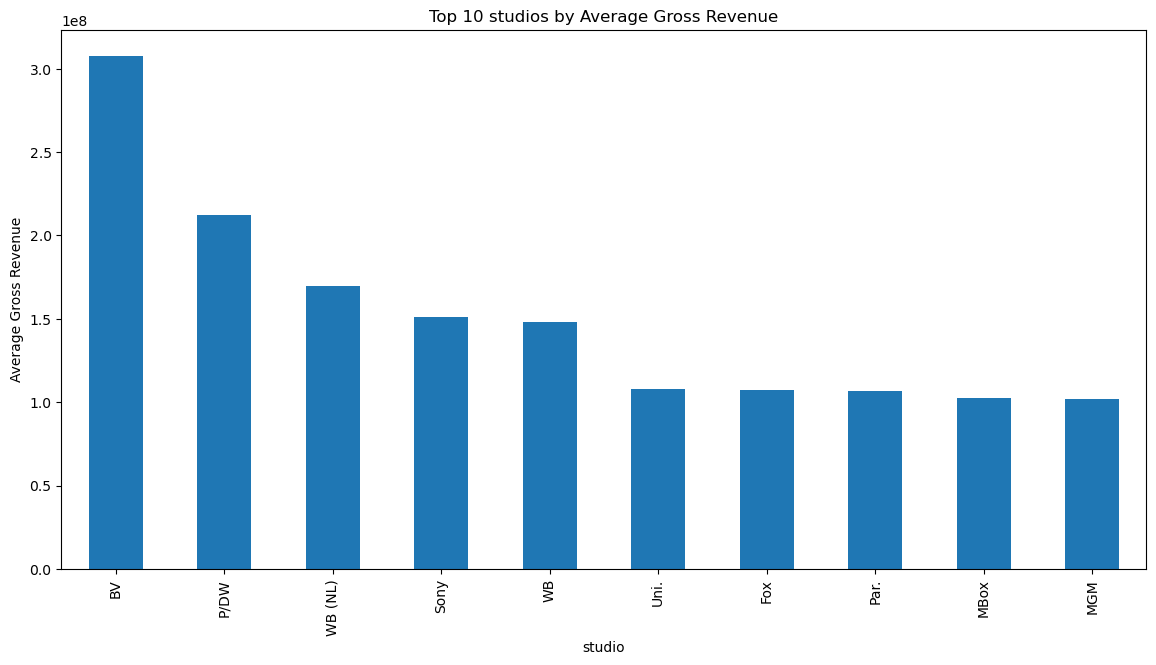

In [467]:
plt.figure(figsize=(14, 7))
top_studioes = df_cleaned.groupby('studio')['domestic_gross'].mean().nlargest(10)
top_studioes.plot(kind='bar')
plt.title('Top 10 studios by Average Gross Revenue')
plt.xlabel('studio')
plt.ylabel('Average Gross Revenue')
plt.show()


In [223]:
gross_figs = df_cleaned.drop_duplicates(subset='movie_id')

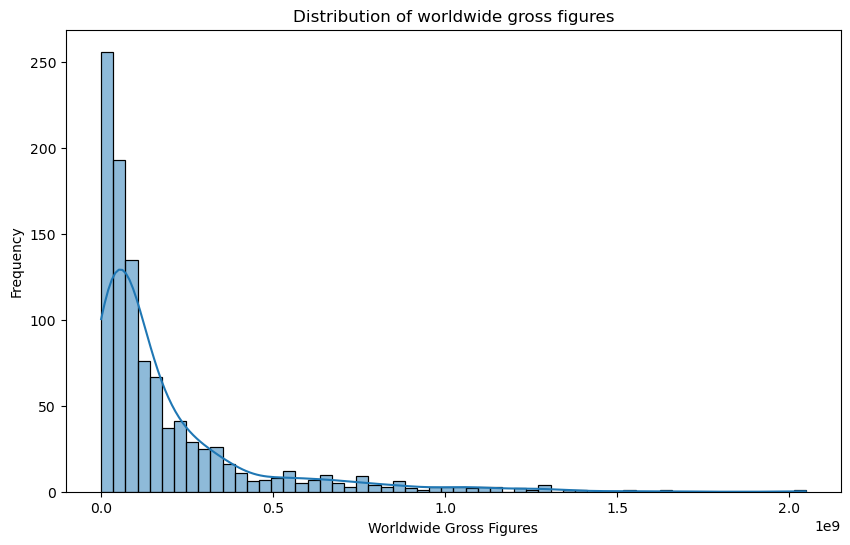

In [468]:
plt.figure(figsize=(10, 6))
sns.histplot(gross_figs['worldwide_gross'], bins='auto', kde=True)
plt.title('Distribution of worldwide gross figures')
plt.xlabel('Worldwide Gross Figures')
plt.ylabel('Frequency')
plt.show()


This graph shows the distribution of worldwide grossing figures and is as expected; few movies outperform while most movies are at the lower end of the graph.

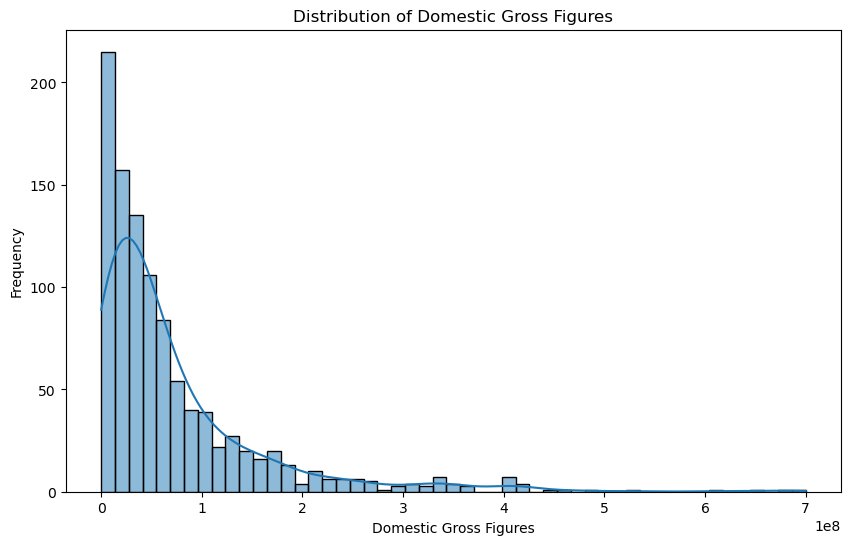

In [225]:
plt.figure(figsize=(10, 6))
sns.histplot(gross_figs['domestic_gross'], bins='auto', kde=True)
plt.title('Distribution of Domestic Gross Figures')
plt.xlabel('Domestic Gross Figures')
plt.ylabel('Frequency')
plt.show()


The same is true for domestic figures however a greater proportion of movies seem to do better domestically compared to globally

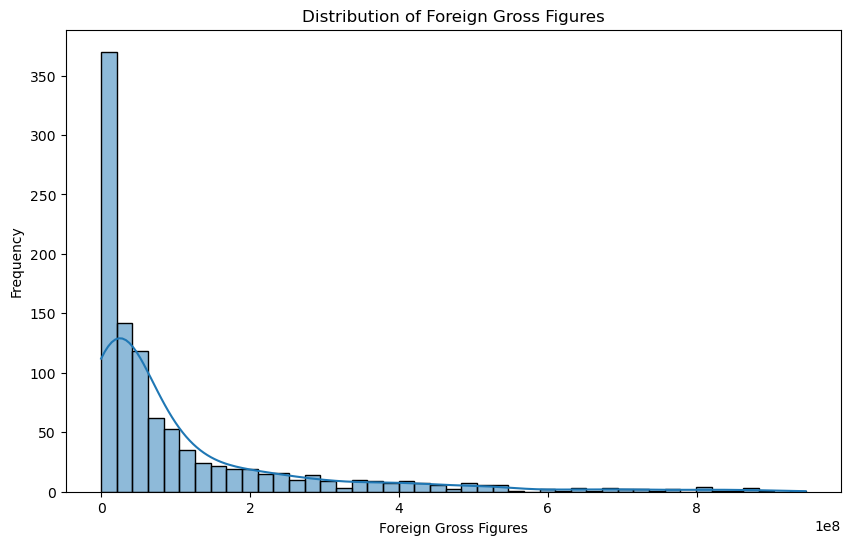

In [226]:
plt.figure(figsize=(10, 6))
sns.histplot(gross_figs['foreign_gross'], bins='auto', kde=True)
plt.title('Distribution of Foreign Gross Figures')
plt.xlabel('Foreign Gross Figures')
plt.ylabel('Frequency')
plt.show()


The reverse is true for foreign gross figures. There is an extremely large proportion of the data clustered on the left of the graph, indicating that generakky, movies perform poorly abroad.

In [227]:
genre_counts = gross_figs['genres'].value_counts()[:30]

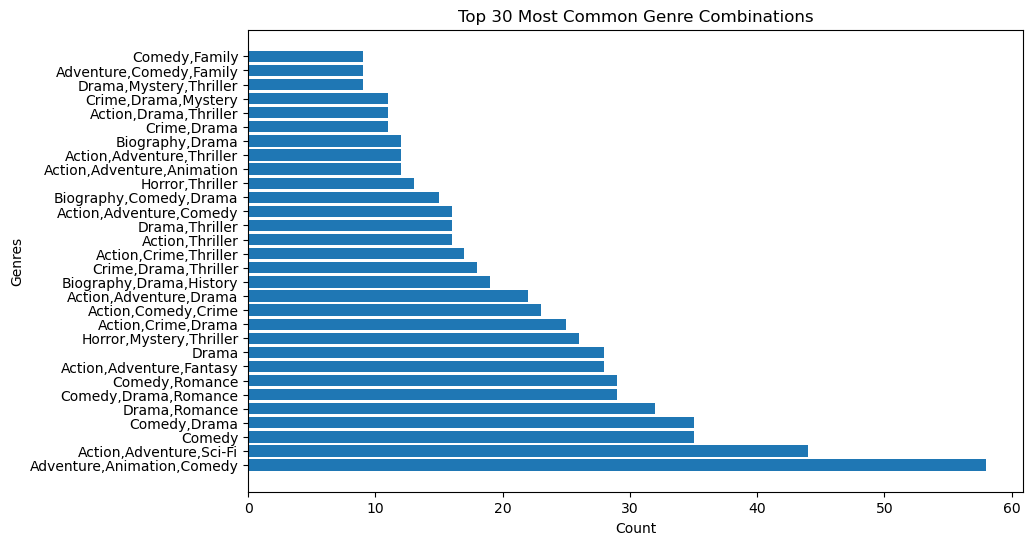

In [228]:
plt.figure(figsize=(10, 6))
plt.barh(genre_counts.index, width=genre_counts.values)
plt.title('Top 30 Most Common Genre Combinations')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()


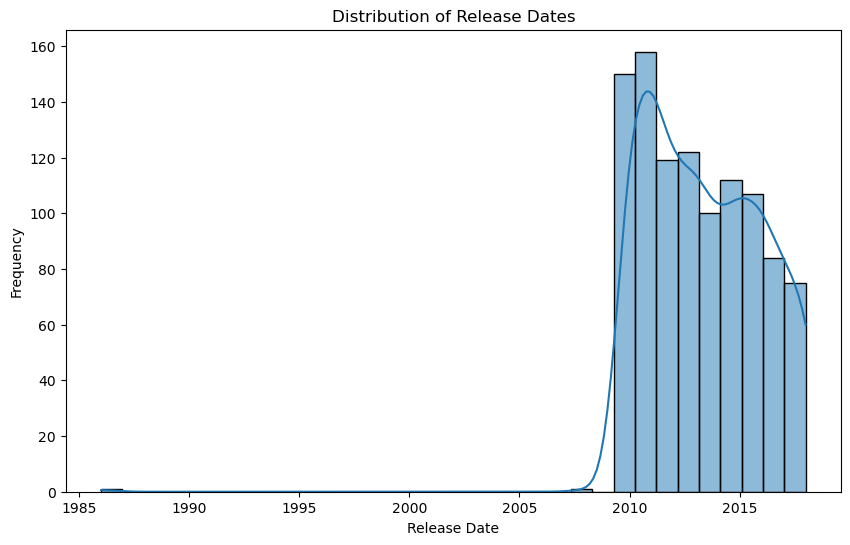

In [231]:
plt.figure(figsize=(10, 6))
sns.histplot(gross_figs['release_date'].dt.year, bins='auto', kde=True)
plt.title('Distribution of Release Dates')
plt.xlabel('Release Date')
plt.ylabel('Frequency')
plt.show()


The data being used seems to be clustered mainly around the 2010s which may can mean relevance to modern-day, but also ignores movies beforehand that could provide important information

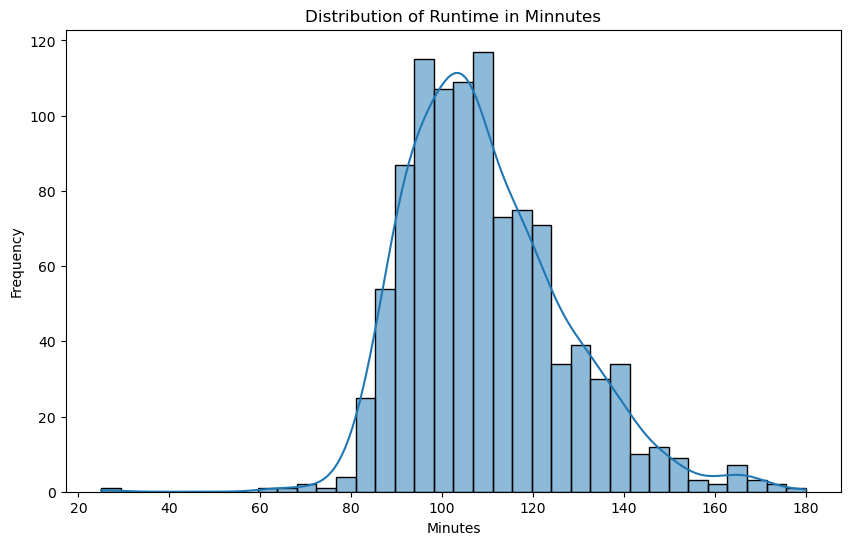

In [235]:
plt.figure(figsize=(10, 6))
sns.histplot(gross_figs['runtime_minutes'], bins='auto', kde=True)
plt.title('Distribution of Runtime in Minnutes')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()


The movie runtime seems to be close to normally distributed with a mean of between 90 minutes and 110 minutes

In [471]:
regions = df_cleaned.drop_duplicates(subset=['movie_id', 'region'])

In [484]:
regions[regions['region']=='BG']

,title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
22268,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
30916,12 Strong,6.6,-1.0,45819713.0,21600000.0,"Action,Drama,History",bg,tt1413492,50155.0,en,...,BG,2018-01-19,130.0,2018.0,WB,5.6,1312.0,7.111838e+07,Peter Craig,2018.0
31169,12 Years a Slave,8.1,-1.0,56671993.0,131100000.0,"Biography,Drama,History",bg,tt2024544,577301.0,en,...,BG,2013-10-30,134.0,2013.0,FoxS,7.9,6631.0,1.810253e+08,John Ridley,2013.0
31377,127 Hours,7.6,-1.0,18335230.0,42400000.0,"Adventure,Biography,Drama",bg,tt1542344,323949.0,en,...,BG,2010-11-05,94.0,2010.0,FoxS,7.0,4469.0,6.021717e+07,Danny Boyle,2010.0
73251,2 Guns,6.7,-1.0,75612460.0,56300000.0,"Action,Comedy,Crime",bg,tt1272878,182025.0,en,...,BG,2013-08-02,109.0,2013.0,Uni.,6.5,2368.0,1.324930e+08,Blake Masters,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059848,Your Highness,5.5,-1.0,21596445.0,3300000.0,"Adventure,Comedy,Fantasy",bg,tt1240982,92940.0,en,...,BG,2010-01-01,102.0,2011.0,Uni.,3.0,4.0,2.612164e+07,Ben Best,2011.0
4067093,Zero Dark Thirty,7.4,-1.0,95720716.0,37100000.0,"Drama,Thriller",bg,tt1790885,251072.0,en,...,BG,2012-12-19,157.0,2012.0,Sony,6.9,2553.0,1.346124e+08,Mark Boal,2012.0
4074611,Zookeeper,5.2,-1.0,80360866.0,89500000.0,"Comedy,Family,Romance",bg,tt1222817,52396.0,en,...,BG,2011-07-08,102.0,2011.0,Sony,5.3,886.0,1.708055e+08,Nick Bakay,2011.0
4075386,Zoolander 2,4.7,-1.0,28848693.0,27900000.0,Comedy,bg,tt1608290,59914.0,en,...,BG,2016-02-12,101.0,2016.0,Par.,4.7,1374.0,5.534869e+07,Ben Stiller,2016.0


In [473]:
regions_count = regions['region'].value_counts()[:30]

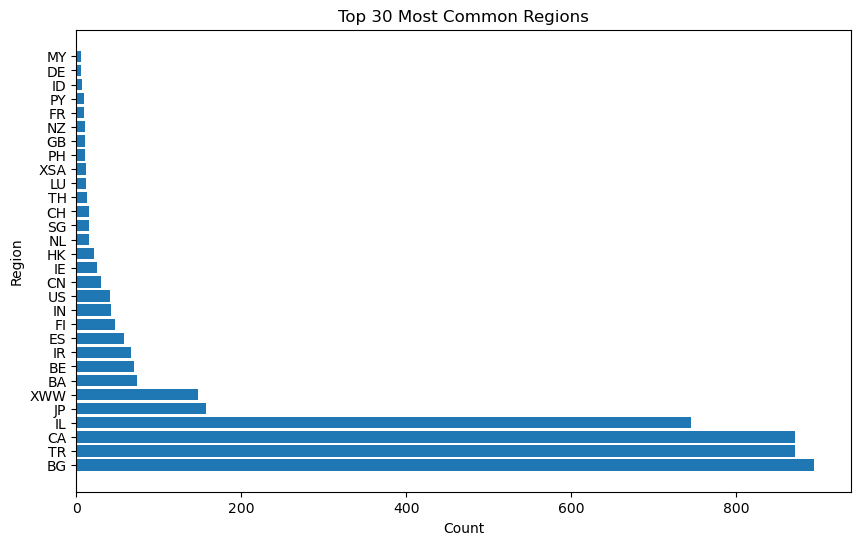

In [474]:
plt.figure(figsize=(10, 6))
plt.barh(regions_count.index, width=regions_count.values)
plt.title('Top 30 Most Common Regions')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


The graph above shows the movies by region.

In [240]:
gross_figs[gross_figs['region'] == 'BG']

,title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,original_language,...,region,release_date,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
22268,10 Cloverfield Lane,7.2,-1.0,72082999.0,38100000.0,"Drama,Horror,Mystery",bg,tt1179933,260383.0,en,...,BG,2016-03-11,103.0,2016.0,Par.,6.9,4629.0,1.082864e+08,Josh Campbell,2016.0
30916,12 Strong,6.6,-1.0,45819713.0,21600000.0,"Action,Drama,History",bg,tt1413492,50155.0,en,...,BG,2018-01-19,130.0,2018.0,WB,5.6,1312.0,7.111838e+07,Peter Craig,2018.0
31169,12 Years a Slave,8.1,-1.0,56671993.0,131100000.0,"Biography,Drama,History",bg,tt2024544,577301.0,en,...,BG,2013-10-30,134.0,2013.0,FoxS,7.9,6631.0,1.810253e+08,John Ridley,2013.0
31377,127 Hours,7.6,-1.0,18335230.0,42400000.0,"Adventure,Biography,Drama",bg,tt1542344,323949.0,en,...,BG,2010-11-05,94.0,2010.0,FoxS,7.0,4469.0,6.021717e+07,Danny Boyle,2010.0
73251,2 Guns,6.7,-1.0,75612460.0,56300000.0,"Action,Comedy,Crime",bg,tt1272878,182025.0,en,...,BG,2013-08-02,109.0,2013.0,Uni.,6.5,2368.0,1.324930e+08,Blake Masters,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059848,Your Highness,5.5,-1.0,21596445.0,3300000.0,"Adventure,Comedy,Fantasy",bg,tt1240982,92940.0,en,...,BG,2010-01-01,102.0,2011.0,Uni.,3.0,4.0,2.612164e+07,Ben Best,2011.0
4067093,Zero Dark Thirty,7.4,-1.0,95720716.0,37100000.0,"Drama,Thriller",bg,tt1790885,251072.0,en,...,BG,2012-12-19,157.0,2012.0,Sony,6.9,2553.0,1.346124e+08,Mark Boal,2012.0
4074611,Zookeeper,5.2,-1.0,80360866.0,89500000.0,"Comedy,Family,Romance",bg,tt1222817,52396.0,en,...,BG,2011-07-08,102.0,2011.0,Sony,5.3,886.0,1.708055e+08,Nick Bakay,2011.0
4075386,Zoolander 2,4.7,-1.0,28848693.0,27900000.0,Comedy,bg,tt1608290,59914.0,en,...,BG,2016-02-12,101.0,2016.0,Par.,4.7,1374.0,5.534869e+07,Ben Stiller,2016.0


Below, we analyse the most common languages that movies are written in (excluding English)

In [246]:
orig_lang = gross_figs['original_language'].value_counts()[1:30]

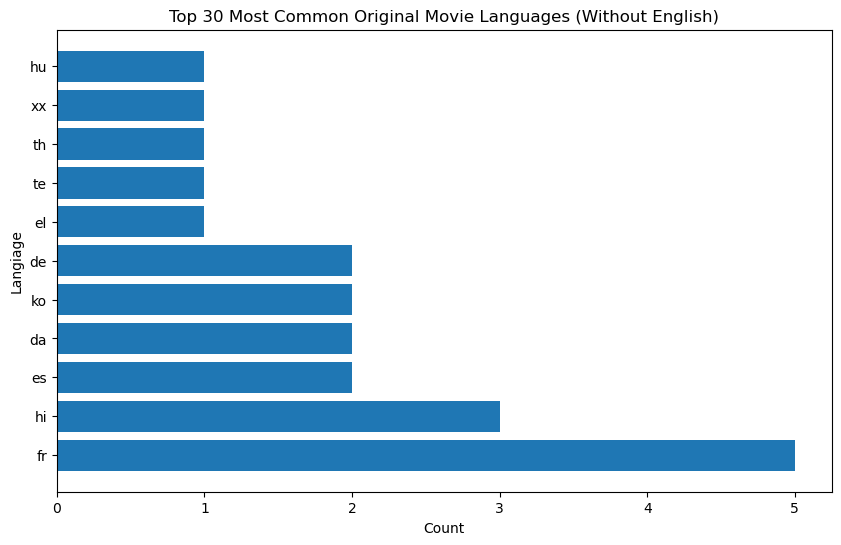

In [247]:
plt.figure(figsize=(10, 6))
plt.barh(orig_lang.index, width=orig_lang.values)
plt.title('Top 30 Most Common Original Movie Languages (Without English)')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


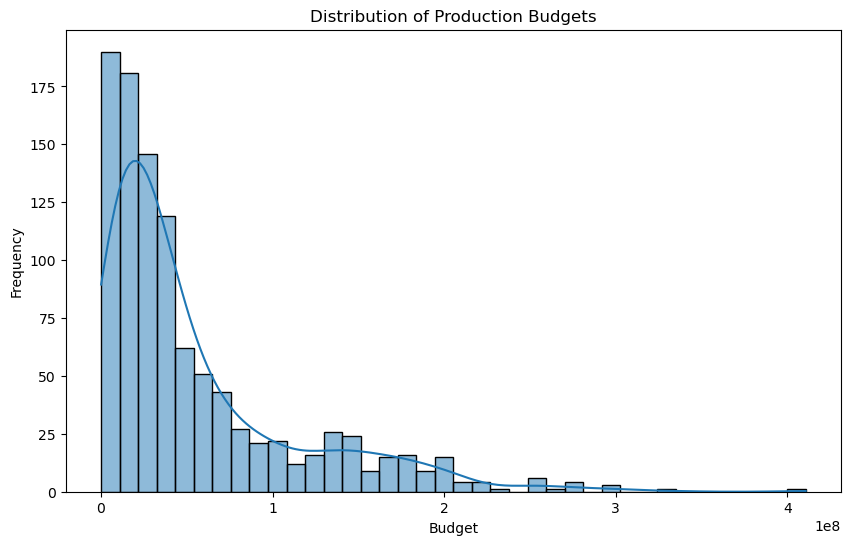

In [248]:
plt.figure(figsize=(10, 6))
sns.histplot(gross_figs['production_budget'], bins='auto', kde=True)
plt.title('Distribution of Production Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()


Above is the distribution of production budgets, similar to the grossing charts, the data is crowded around the left of the chart, indicating most films are relatively low-cost to make. However unlike the grossing charts, there is a significant presence of data as you move to the right of the chart. This indicates that some movies may be expensive to make but underperform in the box office

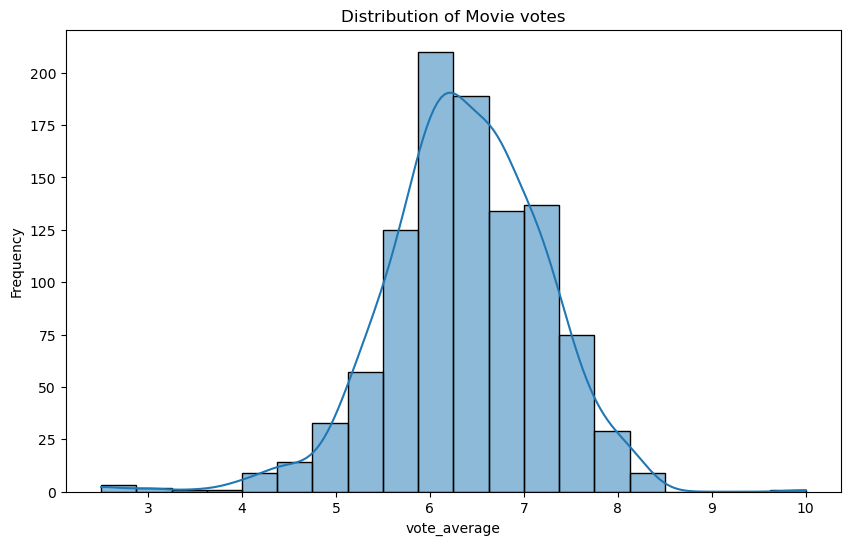

In [485]:
plt.figure(figsize=(10, 6))
sns.histplot(gross_figs['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie votes')
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.show()


The graph above shows how votes are distribted. Like runtime, the graph is normally distributed with a mean of roughly 6.

 # Data Analysis

In [438]:
df = pd.read_csv('finalData/cleaned_data.csv')

In [439]:
df.shape

(90313, 25)

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90313 entries, 0 to 90312
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         90313 non-null  int64  
 1   title              90313 non-null  object 
 2   averagerating      90313 non-null  float64
 3   death_year         90313 non-null  float64
 4   domestic_gross     90313 non-null  float64
 5   foreign_gross      90313 non-null  float64
 6   genres             90313 non-null  object 
 7   language           90313 non-null  object 
 8   movie_id           90313 non-null  object 
 9   numvotes           90313 non-null  float64
 10  original_language  90313 non-null  object 
 11  person_id          90313 non-null  object 
 12  popularity         90313 non-null  float64
 13  director           90313 non-null  object 
 14  production_budget  90313 non-null  float64
 15  region             90313 non-null  object 
 16  release_date       903

In [441]:
df_unique = df.drop_duplicates(subset='movie_id')

##### Comparing Top 10 & Least 10 Genres by Average Rating

In [442]:
# Group the data by genre and calculate the average rating for each genre
average_rating = df_unique.groupby('genres')['averagerating'].mean().reset_index()


#Sort the values in descending order to get the top 10
average_rating = average_rating.sort_values(by='averagerating', ascending=False)

#Display top 10 genres
top_10_genres = average_rating.head(10)

#Display 10 worst genres
least_10_genres = average_rating.tail(10)

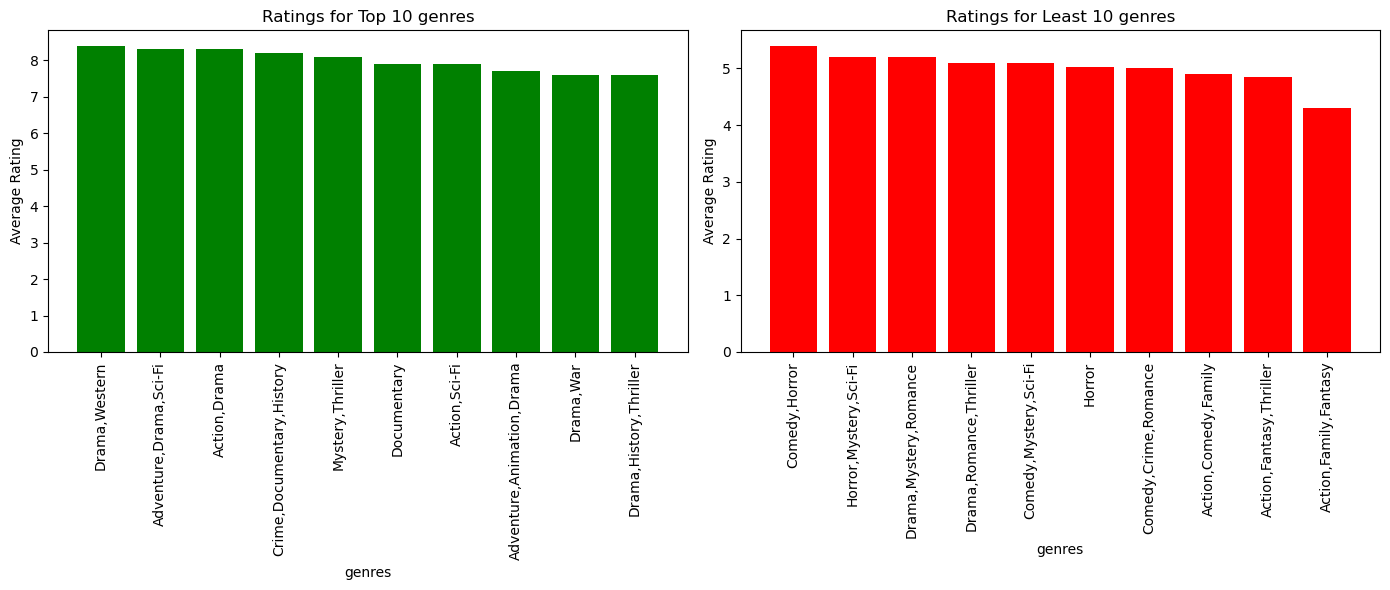

In [443]:
# Plot 2 bar graphs (one showing 10 best rated genres, and another showing 10 worst rated genres)

#Bar graph showing 10 best rated genres
fig, axs = plt.subplots(1,2, figsize=(14, 6))
axs[0].bar(top_10_genres['genres'], top_10_genres['averagerating'], color='green')
axs[0].set_xlabel ('genres')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('Ratings for Top 10 genres')
axs[0].tick_params(axis='x', rotation=90)


#Bar graph showing 10 worst rated genres
axs[1].bar(least_10_genres['genres'], least_10_genres['averagerating'], color = 'red')
axs[1].set_xlabel ('genres')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Ratings for Least 10 genres')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()  
plt.savefig('images/top_genres.jpeg')
plt.show()

As seen in the charts above, the adventure genre stands out as the highest-rated category among the genres analyzed. This suggests a strong audience preference and engagement with adventure films, indicating a significant opportunity for investment in this genre. Conversely, the Comedy-Thriller genre displayed disappointing ratings.It may be prudent to approach investments in the Comedy-Thriller genre with caution.

#### Production budget vs foreign gross

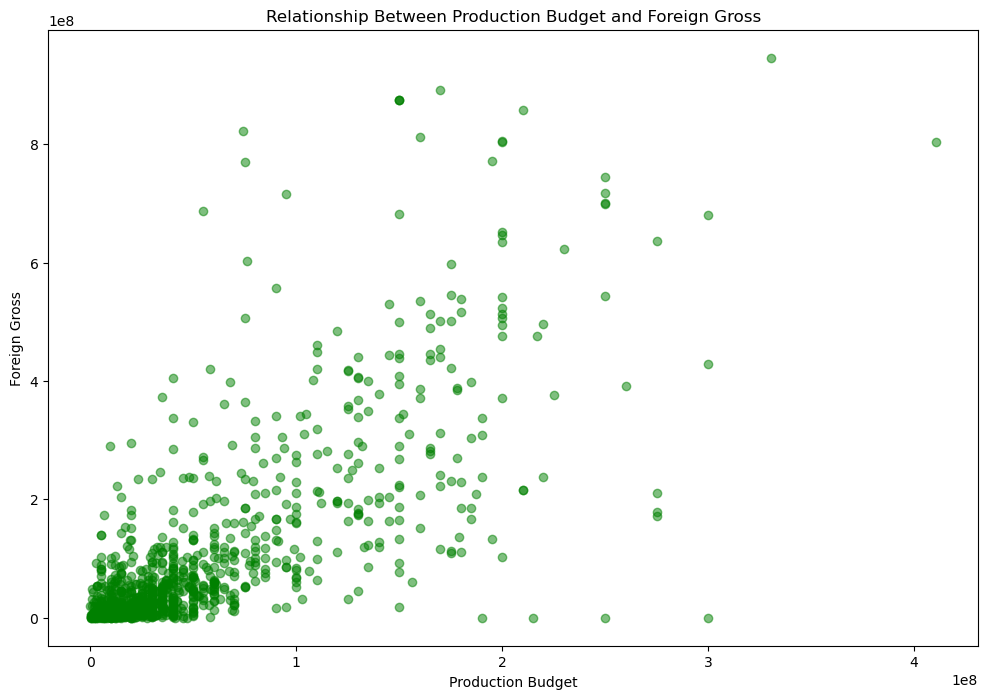

In [444]:
# Plot a scatter graph to show the relationship between production budget and foreign gross revenue

fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(df_unique['production_budget'], df_unique['foreign_gross'], alpha=0.5, color='green')
plt.xlabel('Production Budget')
plt.ylabel('Foreign Gross')
plt.title('Relationship Between Production Budget and Foreign Gross')
plt.show()

In [445]:
df[['title', 'region', 'domestic_gross']]

,title,region,domestic_gross
0,10 Cloverfield Lane,BG,72082999.0
1,10 Cloverfield Lane,BG,72082999.0
2,10 Cloverfield Lane,BG,72082999.0
3,10 Cloverfield Lane,CA,72082999.0
4,10 Cloverfield Lane,CA,72082999.0
...,...,...,...
90308,Zootopia,TR,341268248.0
90309,Zootopia,TR,341268248.0
90310,Zootopia,TR,341268248.0
90311,Zootopia,TR,341268248.0


The scatter plot indicates an average positive correlation between the production budget and foreign gross income. This suggests that higher investment in production often translates to better financial performance of the movie.

####  Trend showing number of movies released each year

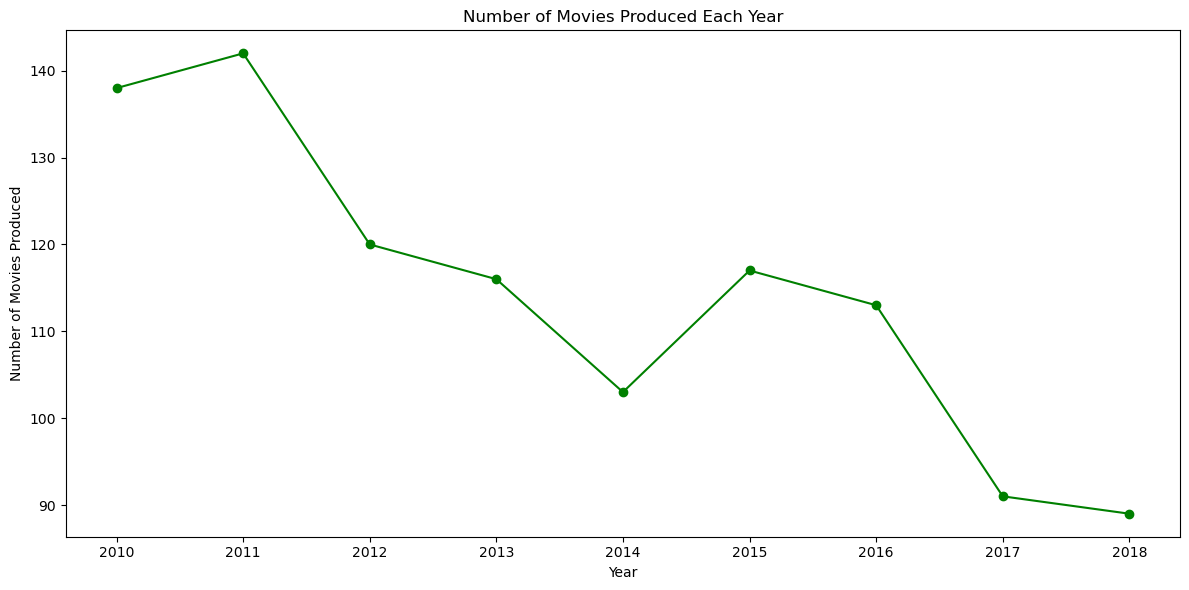

In [446]:
# Group data by 'year'

movies_per_year = df_unique.groupby('year')['movie_id'].count()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year, marker='o', color='green', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Movies Produced')
plt.title('Number of Movies Produced Each Year')
plt.xticks(rotation= 0)
plt.tight_layout()  
plt.show()

The data reveals that the number of movies released reached its highest point in 2013. Following the peak in 2013, there has been a noticeable decline in the number of movies released each year. Further investigation is needed to understand the cause of decline in production

#### Average Production Budget Over Time

In [447]:
# Group data by year then find average production budget in each year
avg_budget_per_year = df_unique.groupby('year')['production_budget'].mean()

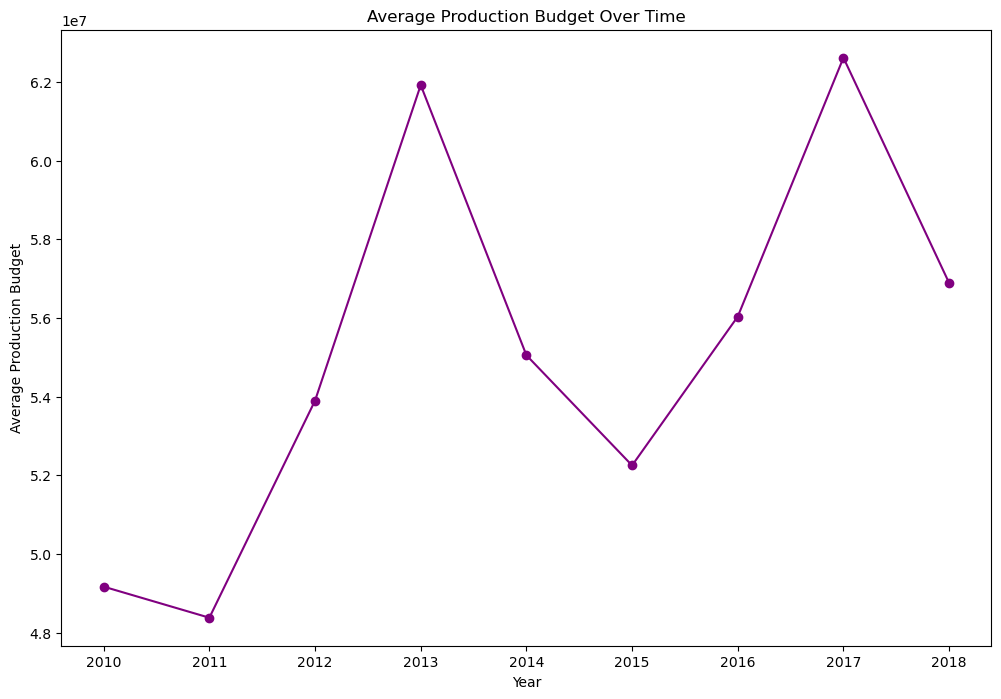

In [448]:
# Plot line graph showing average production over time

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(avg_budget_per_year, marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget Over Time')
plt.show()

##### Top 10 Writers with the Best Rated Movies

In [449]:
temp = df[df['language'] == 'en']

In [450]:
writer_df = temp.drop_duplicates(subset=['writer', 'movie_id'])
# We take the writers that produce movies originally written in English
writer_counts = writer_df['writer'].value_counts()
writers_3_or_more = writer_counts[writer_counts >= 2].index

# Step 3: Filter the DataFrame to keep only those writers
filtered_writer_df = writer_df[writer_df['writer'].isin(writers_3_or_more)]

In [451]:
filtered_writer_df

,Unnamed: 0,title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,...,region,release_date,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
48,30988,12 Strong,6.6,-1.0,45819713.0,21600000.0,"Action,Drama,History",en,tt1413492,50155.0,...,XWW,2018-01-19,130.0,2018.0,WB,5.6,1312.0,7.111838e+07,Peter Craig,2018.0
109,31384,127 Hours,7.6,-1.0,18335230.0,42400000.0,"Adventure,Biography,Drama",en,tt1542344,323949.0,...,CA,2010-11-05,94.0,2010.0,FoxS,7.0,4469.0,6.021717e+07,Simon Beaufoy,2010.0
588,81452,3 Days to Kill,6.2,-1.0,30697999.0,21900000.0,"Action,Drama,Thriller",en,tt2172934,81681.0,...,JP,2014-02-14,117.0,2014.0,Rela.,6.1,1279.0,3.895990e+07,Luc Besson,2014.0
704,335423,A Good Day to Die Hard,5.3,-1.0,67349198.0,237300000.0,"Action,Thriller",en,tt1606378,188383.0,...,JP,2013-02-14,98.0,2013.0,Fox,5.2,4437.0,3.042492e+08,Skip Woods,2013.0
794,340888,A Most Wanted Man,6.8,-1.0,17237855.0,19000000.0,"Crime,Drama,Thriller",en,tt1972571,67914.0,...,XWW,2014-07-25,122.0,2014.0,RAtt.,6.5,784.0,3.606889e+07,Stephen Cornwell,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87858,4076067,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",en,tt2948356,383446.0,...,HK,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Rich Moore,2016.0
87859,4076068,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",en,tt2948356,383446.0,...,HK,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jim Reardon,2016.0
87861,4076070,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",en,tt2948356,383446.0,...,HK,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jared Bush,2016.0
87862,4076071,Zootopia,8.0,-1.0,341268248.0,682500000.0,"Adventure,Animation,Comedy",en,tt2948356,383446.0,...,HK,2016-03-04,108.0,2016.0,BV,7.7,9977.0,1.019430e+09,Jennifer Lee,2016.0


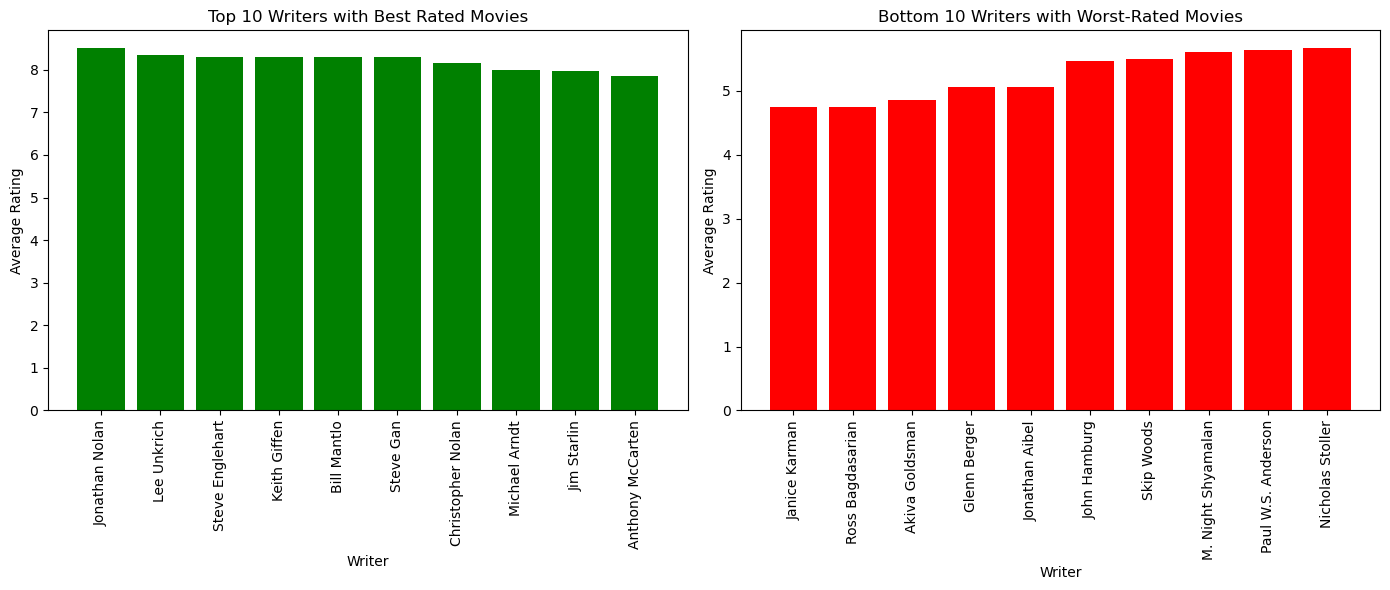

In [452]:
# Group data by writers and calculate average rating of each writers movies

top_writers = filtered_writer_df.groupby('writer')['averagerating'].mean().reset_index()

#Sort the values to get the top 10 writers with the best ratings
top_writers = top_writers.sort_values(by='averagerating', ascending=False)
poor_writers = top_writers.sort_values(by='averagerating', ascending=True)

# Top 10 writers
top_10_writers = top_writers.head(10)
least_10_writers = poor_writers.head(10)

# Plot 2 graphs (one showing writers with the best rated movies, the other showing writers with poorly rated movies)
fig, axs = plt.subplots(1,2, figsize=(14, 6))
axs[0].bar(top_10_writers['writer'], top_10_writers['averagerating'], color='green')
axs[0].set_xlabel('Writer')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('Top 10 Writers with Best Rated Movies')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(least_10_writers['writer'], least_10_writers['averagerating'], color='red')
axs[1].set_xlabel('Writer')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Bottom 10 Writers with Worst-Rated Movies')
axs[1].tick_params(axis='x', rotation=90)
plt.tight_layout()  
plt.savefig('images/top_writers.jpeg')
plt.show()


The data identifies Richard Heap as a particularly strong candidate for collaboration, given his consistent high ratings.his experience aligns well with the studio's goals of maximizing the success and appeal of its films. In contrast, Yi-an Lou and Yun-chu Tang are writers whose work has generally not performed as well. It may be beneficial for the studio to be selective in collaborating with these writers until their work shows more promise.

##### Distribution of Movie Production Budgets

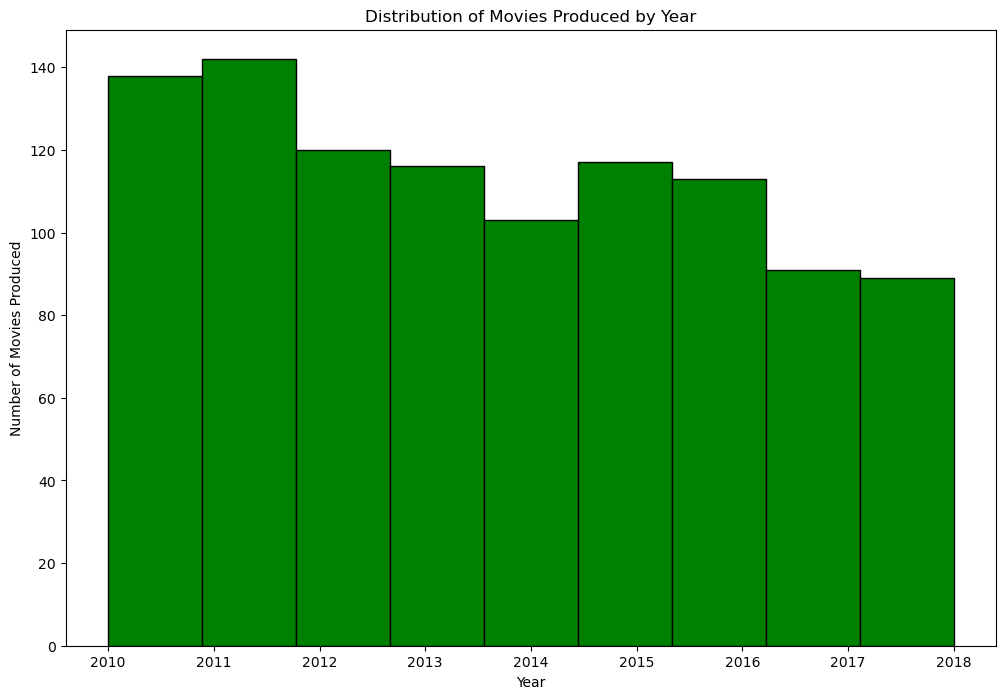

In [453]:
# Plot a histogram showing distribution of movie production budgets
movies_per_year = df.groupby('year')['movie_id'].nunique()

plt.figure(figsize=(12, 8))
plt.hist(movies_per_year.index, weights=movies_per_year.values, bins=len(movies_per_year), color='green', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Movies Produced')
plt.title('Distribution of Movies Produced by Year')
plt.show()

In [454]:
top_10_writers

,writer,averagerating
86,Jonathan Nolan,8.500000
97,Lee Unkrich,8.350000
145,Steve Englehart,8.300000
93,Keith Giffen,8.300000
11,Bill Mantlo,8.300000
146,Steve Gan,8.300000
25,Christopher Nolan,8.160000
106,Michael Arndt,8.000000
79,Jim Starlin,7.966667
8,Anthony McCarten,7.850000


Below we identify which writers had the highest grossing films as well as the filming budgets

In [455]:
writers = top_10_writers['writer'].values

In [456]:
writers = writers.tolist()

In [457]:
df_top10_writers  = filtered_writer_df[filtered_writer_df['writer'].isin(writers)]

In [458]:
df_top10_writers

,Unnamed: 0,title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,...,region,release_date,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
3514,763680,Avengers: Age of Ultron,7.3,-1.0,459005868.0,946400000.0,"Action,Adventure,Sci-Fi",en,tt2395427,665594.0,...,XWW,2015-05-01,141.0,2015.0,BV,7.3,13457.0,1.403014e+09,Jim Starlin,2015.0
3651,766331,Avengers: Infinity War,8.5,-1.0,678815482.0,1369.5,"Action,Adventure,Sci-Fi",en,tt4154756,670926.0,...,IN,2018-04-27,149.0,2018.0,BV,8.3,13948.0,2.048134e+09,Keith Giffen,2018.0
3659,766339,Avengers: Infinity War,8.5,-1.0,678815482.0,1369.5,"Action,Adventure,Sci-Fi",en,tt4154756,670926.0,...,IN,2018-04-27,149.0,2018.0,BV,8.3,13948.0,2.048134e+09,Steve Englehart,2018.0
3660,766340,Avengers: Infinity War,8.5,-1.0,678815482.0,1369.5,"Action,Adventure,Sci-Fi",en,tt4154756,670926.0,...,IN,2018-04-27,149.0,2018.0,BV,8.3,13948.0,2.048134e+09,Bill Mantlo,2018.0
3661,766341,Avengers: Infinity War,8.5,-1.0,678815482.0,1369.5,"Action,Adventure,Sci-Fi",en,tt4154756,670926.0,...,IN,2018-04-27,149.0,2018.0,BV,8.3,13948.0,2.048134e+09,Steve Gan,2018.0
3662,766342,Avengers: Infinity War,8.5,-1.0,678815482.0,1369.5,"Action,Adventure,Sci-Fi",en,tt4154756,670926.0,...,IN,2018-04-27,149.0,2018.0,BV,8.3,13948.0,2.048134e+09,Jim Starlin,2018.0
7930,874215,Bohemian Rhapsody,8.0,-1.0,216303339.0,687200000.0,"Biography,Drama,Music",en,tt1727824,345466.0,...,CA,2018-11-02,134.0,2018.0,Fox,8.1,7629.0,8.949853e+08,Anthony McCarten,2018.0
12394,978333,Coco,8.4,-1.0,209726015.0,597400000.0,"Adventure,Animation,Comedy",en,tt2380307,277194.0,...,JP,2017-11-22,105.0,2017.0,BV,8.2,8669.0,7.980081e+08,Lee Unkrich,2017.0
14804,1077454,Dunkirk,7.9,-1.0,190068280.0,337200000.0,"Action,Drama,History",en,tt5013056,466580.0,...,GB,2017-07-19,106.0,2017.0,WB,7.4,9156.0,4.998374e+08,Christopher Nolan,2017.0
18112,1550449,Guardians of the Galaxy,8.1,-1.0,333172112.0,440200000.0,"Action,Adventure,Comedy",en,tt2015381,948394.0,...,CA,2014-08-01,121.0,2014.0,BV,7.9,17958.0,7.708675e+08,Keith Giffen,2014.0


In [459]:
df_10_writer_gross = df_top10_writers.groupby('writer')['worldwide_gross'].mean()
df_10_writer_budget = df_top10_writers.groupby('writer')['production_budget'].mean()

We have taken the average worldwide grossing as that can be expected to be a combination of domestic and foreign grossing figures
We have also taken the average production budgets to use as a comparison tool

In [460]:
df_10_writer_gross= df_10_writer_gross.sort_values(ascending=False)
df_10_writer_gross

writer
Bill Mantlo          1.409501e+09
Keith Giffen         1.409501e+09
Steve Englehart      1.409501e+09
Steve Gan            1.409501e+09
Jim Starlin          1.407339e+09
Lee Unkrich          9.334438e+08
Michael Arndt        9.293279e+08
Jonathan Nolan       8.754092e+08
Christopher Nolan    7.508360e+08
Anthony McCarten     5.091565e+08
Name: worldwide_gross, dtype: float64

In [461]:
df_10_writer_budget= df_10_writer_budget.sort_values(ascending=False)
df_10_writer_budget

writer
Jim Starlin          2.668667e+08
Bill Mantlo          2.350000e+08
Keith Giffen         2.350000e+08
Steve Englehart      2.350000e+08
Steve Gan            2.350000e+08
Jonathan Nolan       2.200000e+08
Christopher Nolan    1.950000e+08
Lee Unkrich          1.875000e+08
Michael Arndt        1.683333e+08
Anthony McCarten     3.500000e+07
Name: production_budget, dtype: float64

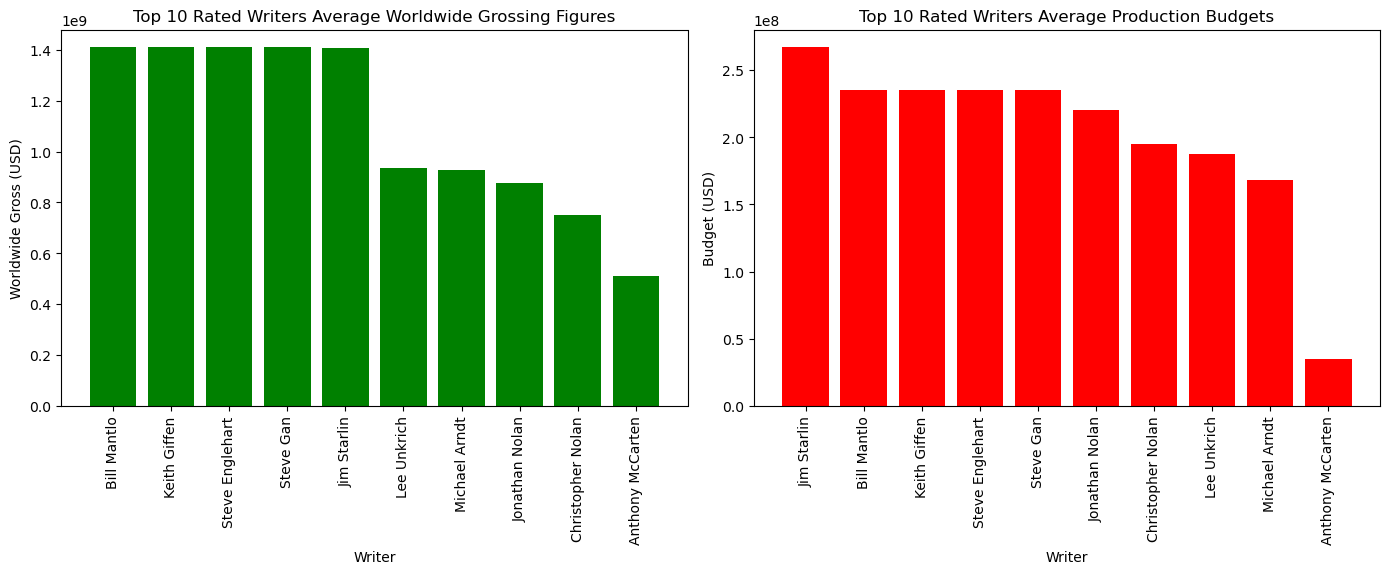

In [462]:
fig, axs = plt.subplots(1,2, figsize=(14, 6))
axs[0].bar(df_10_writer_gross.index, df_10_writer_gross.values, color='green')
axs[0].set_xlabel('Writer')
axs[0].set_ylabel('Worldwide Gross (USD)')
axs[0].set_title('Top 10 Rated Writers Average Worldwide Grossing Figures')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(df_10_writer_budget.index, df_10_writer_budget.values, color='red')
axs[1].set_xlabel('Writer')
axs[1].set_ylabel('Budget (USD)')
axs[1].set_title('Top 10 Rated Writers Average Production Budgets')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('images/top_10_grossing.png')
plt.show()


The above graph highlights writers such as Christopher Nolan, Jonathan Nolan, and Jim Starlin with significantly high grossing films (over $750 million) but with production budgets typically above $100 million.

This may prove to be expensive, so we can have a look at movies whose budget is below $55 million

In [463]:
# Group the data by genre and calculate the average rating for each genre
average_rating_below_50 = df_unique[df_unique['production_budget']<55000000].groupby('genres')['averagerating'].mean().reset_index()


#Sort the values in descending order to get the top 10
average_rating_below_50 = average_rating_below_50.sort_values(by='averagerating', ascending=False)

#Display top 10 genres
top_10_genres_below_50 = average_rating_below_50.head(10)

#Display 10 worst genres
least_10_genres_below_50 = average_rating_below_50.tail(10)

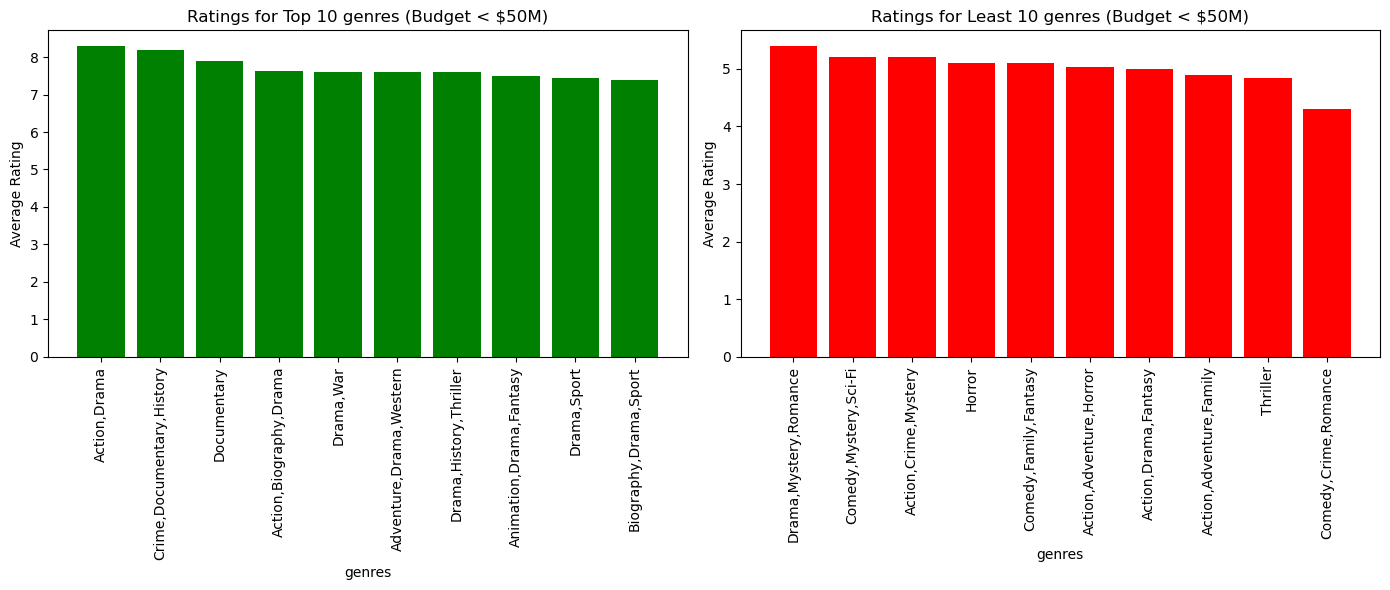

In [464]:
# Plot 2 bar graphs (one showing 10 best rated genres, and another showing 10 worst rated genres)

#Bar graph showing 10 best rated genres
fig, axs = plt.subplots(1,2, figsize=(14, 6))
axs[0].bar(top_10_genres_below_50['genres'], top_10_genres_below_50['averagerating'], color='green')
axs[0].set_xlabel ('genres')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('Ratings for Top 10 genres (Budget < $50M)')
axs[0].tick_params(axis='x', rotation=90)


#Bar graph showing 10 worst rated genres
axs[1].bar(least_10_genres_below_50['genres'], least_10_genres['averagerating'], color = 'red')
axs[1].set_xlabel ('genres')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Ratings for Least 10 genres (Budget < $50M)')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()  
plt.savefig('images/top_genres_below_50.png')
plt.show()

Analysis on genres by their average ratings under budget constraints of $50 million.

This shows that genres like Action-Drama and Documentary-History scored highly, while genres like Comedy-Romance and Horror had lower ratings.

In [410]:
below_50_df = filtered_writer_df[filtered_writer_df['production_budget']<55000000]

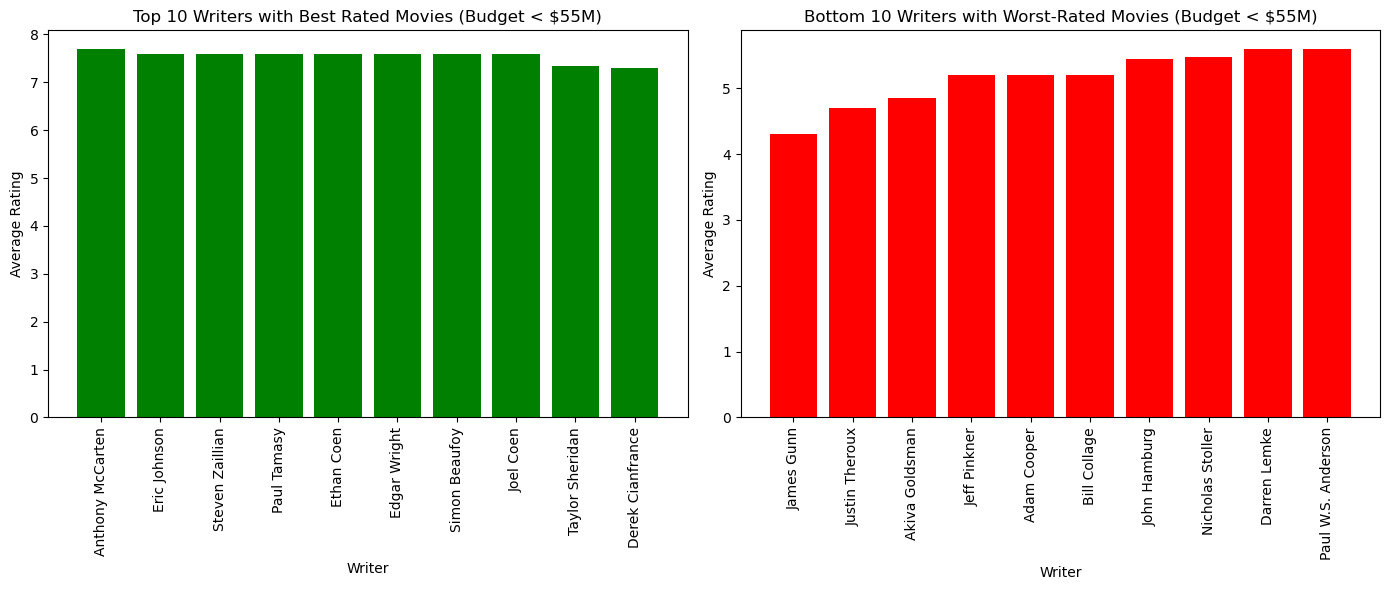

In [465]:
# Group data by writers and calculate average rating of each writers movies

top_writers_below_50 = below_50_df.groupby('writer')['averagerating'].mean().reset_index()

#Sort the values to get the top 10 writers with the best ratings
top_writers_below_50 = top_writers_below_50.sort_values(by='averagerating', ascending=False)
poor_writers_below_50 = top_writers_below_50.sort_values(by='averagerating', ascending=True)

# Top 10 writers
top_10_writers = top_writers_below_50.head(10)
least_10_writers = poor_writers_below_50.head(10)

# Plot 2 graphs (one showing writers with the best rated movies, the other showing writers with poorly rated movies)
fig, axs = plt.subplots(1,2, figsize=(14, 6))
axs[0].bar(top_10_writers['writer'], top_10_writers['averagerating'], color='green')
axs[0].set_xlabel('Writer')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('Top 10 Writers with Best Rated Movies (Budget < $55M)')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(least_10_writers['writer'], least_10_writers['averagerating'], color='red')
axs[1].set_xlabel('Writer')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Bottom 10 Writers with Worst-Rated Movies (Budget < $55M)')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('images/top_writers_below_50.png')
plt.show()


This shows us the writers with the best ratings and have film budgets of less than $55 million

Below we attempt to filter the data using the shortlist of writers and analyse the grossing figures 

In [412]:
top_writers_below_50

,writer,averagerating
5,Anthony McCarten,7.70
16,Eric Johnson,7.60
61,Steven Zaillian,7.60
45,Paul Tamasy,7.60
17,Ethan Coen,7.60
...,...,...
1,Adam Cooper,5.20
30,Jeff Pinkner,5.20
2,Akiva Goldsman,4.85
36,Justin Theroux,4.70


In [413]:
writers_below_50= top_10_writers['writer'].tolist()

In [414]:
writers_below_50

['Anthony McCarten',
 'Eric Johnson',
 'Steven Zaillian',
 'Paul Tamasy',
 'Ethan Coen',
 'Edgar Wright',
 'Simon Beaufoy',
 'Joel Coen',
 'Taylor Sheridan',
 'Derek Cianfrance']

In [415]:
df_top10_writers_below_50  = below_50_df[below_50_df['writer'].isin(writers_below_50)]

In [416]:
df_top10_writers_below_50

,Unnamed: 0,title,averagerating,death_year,domestic_gross,foreign_gross,genres,language,movie_id,numvotes,...,region,release_date,runtime_minutes,start_year,studio,vote_average,vote_count,worldwide_gross,writer,year
109,31384,127 Hours,7.6,-1.0,18335230.0,42400000.0,"Adventure,Biography,Drama",en,tt1542344,323949.0,...,CA,2010-11-05,94.0,2010.0,FoxS,7.0,4469.0,60217171.0,Simon Beaufoy,2010.0
5969,780386,Baby Driver,7.6,-1.0,107825862.0,119100000.0,"Action,Crime,Drama",en,tt3890160,363977.0,...,CA,2017-06-28,113.0,2017.0,TriS,7.4,8034.0,228104185.0,Edgar Wright,2017.0
7866,872052,Blue Valentine,7.4,-1.0,9737892.0,2600000.0,"Drama,Romance",en,tt1120985,170089.0,...,CA,2010-12-29,112.0,2010.0,Wein.,6.9,1677.0,16566240.0,Derek Cianfrance,2010.0
9092,894138,Bridge of Spies,7.6,-1.0,72313754.0,93200000.0,"Drama,History,Thriller",en,tt3682448,263004.0,...,CA,2015-10-16,142.0,2015.0,BV,7.2,4313.0,162498338.0,Ethan Coen,2015.0
9093,894140,Bridge of Spies,7.6,-1.0,72313754.0,93200000.0,"Drama,History,Thriller",en,tt3682448,263004.0,...,CA,2015-10-16,142.0,2015.0,BV,7.2,4313.0,162498338.0,Joel Coen,2015.0
34270,2025485,Moneyball,7.6,-1.0,75605492.0,34600000.0,"Biography,Drama,Sport",en,tt1210166,326657.0,...,IL,2011-09-22,133.0,2011.0,Sony,7.1,2255.0,111300835.0,Steven Zaillian,2011.0
59374,2562086,Patriots Day,7.4,-1.0,31886361.0,18700000.0,"Action,Crime,Drama",en,tt4572514,76204.0,...,JM,2016-12-21,133.0,2016.0,LGF,6.9,1337.0,52837989.0,Paul Tamasy,2016.0
59375,2562088,Patriots Day,7.4,-1.0,31886361.0,18700000.0,"Action,Crime,Drama",en,tt4572514,76204.0,...,JM,2016-12-21,133.0,2016.0,LGF,6.9,1337.0,52837989.0,Eric Johnson,2016.0
65725,2821487,Sicario,7.6,-1.0,46889293.0,38000000.0,"Action,Crime,Drama",en,tt3397884,328548.0,...,CA,2015-09-18,121.0,2015.0,LGF,7.3,4475.0,84393749.0,Taylor Sheridan,2015.0
65735,2821556,Sicario: Day of the Soldado,7.1,-1.0,50065850.0,25800000.0,"Action,Crime,Drama",en,tt5052474,95650.0,...,GB,2018-06-29,122.0,2018.0,Sony,6.7,1317.0,75885196.0,Taylor Sheridan,2018.0


In [421]:
df_10_writer_gross_below_50 = df_top10_writers_below_50.groupby('writer')['worldwide_gross'].mean()
df_10_writer_budget_below_50 = df_top10_writers_below_50.groupby('writer')['production_budget'].mean()

In [422]:
df_10_writer_gross_below_50= df_10_writer_gross_below_50.sort_values(ascending=False)
df_10_writer_gross_below_50

writer
Edgar Wright        228104185.0
Ethan Coen          207387633.0
Joel Coen           207387633.0
Anthony McCarten    123327692.0
Steven Zaillian     111300835.0
Eric Johnson         91050188.5
Paul Tamasy          91050188.5
Taylor Sheridan      80139472.5
Simon Beaufoy        60217171.0
Derek Cianfrance     19423986.0
Name: worldwide_gross, dtype: float64

In [423]:
df_10_writer_budget_below_50= df_10_writer_budget_below_50.sort_values(ascending=False)
df_10_writer_gross_below_50

writer
Edgar Wright        228104185.0
Ethan Coen          207387633.0
Joel Coen           207387633.0
Anthony McCarten    123327692.0
Steven Zaillian     111300835.0
Eric Johnson         91050188.5
Paul Tamasy          91050188.5
Taylor Sheridan      80139472.5
Simon Beaufoy        60217171.0
Derek Cianfrance     19423986.0
Name: worldwide_gross, dtype: float64

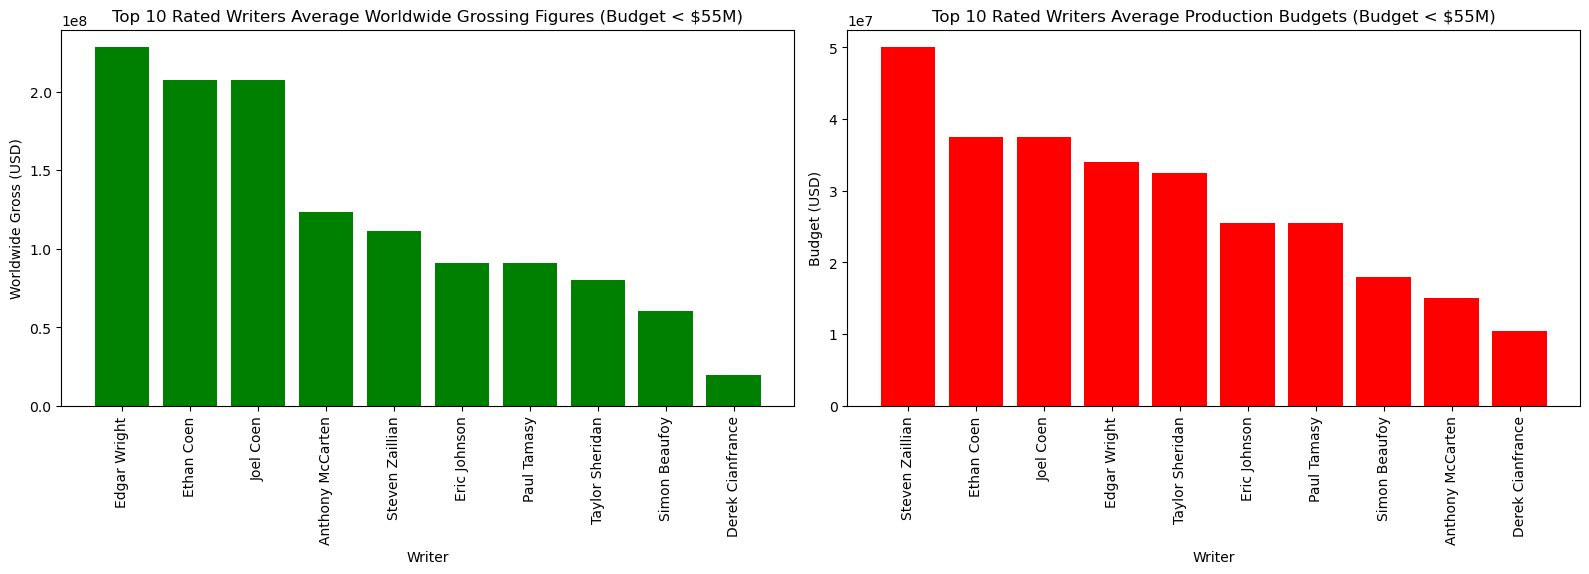

In [466]:
fig, axs = plt.subplots(1,2, figsize=(16, 6))
axs[0].bar(df_10_writer_gross_below_50.index, df_10_writer_gross_below_50.values, color='green')
axs[0].set_xlabel('Writer')
axs[0].set_ylabel('Worldwide Gross (USD)')
axs[0].set_title('Top 10 Rated Writers Average Worldwide Grossing Figures (Budget < $55M)')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(df_10_writer_budget_below_50.index, df_10_writer_budget_below_50.values, color='red')
axs[1].set_xlabel('Writer')
axs[1].set_ylabel('Budget (USD)')
axs[1].set_title('Top 10 Rated Writers Average Production Budgets (Budget < $55M)')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig('images/top_10_grossing_below_50.png')
plt.show()


We can see both worldwide gross  and production budgets for top-rated writers like Edgar Wright, Ethan Coen, Joel Coen, and Anthony McCarten.

<Axes: xlabel='genres'>

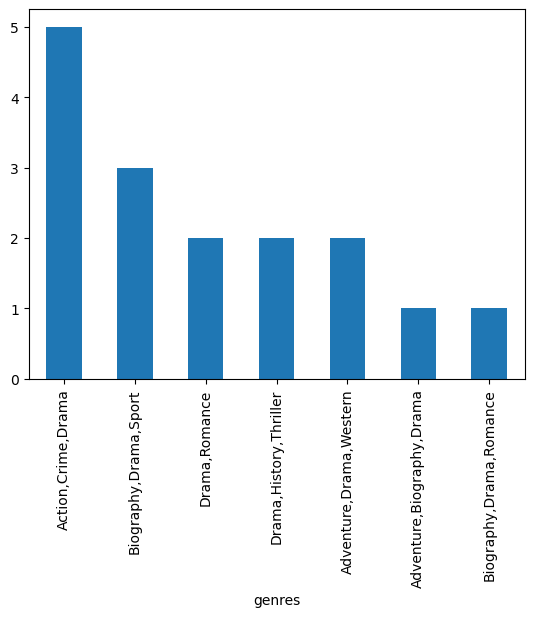

In [429]:
df_top10_writers_below_50['genres'].value_counts().plot.bar()

# Recommendations

1) G2 Corp. should concentrate on producing movies in English and then export these movies to foreign countries. This is as the data makes clear that movies whose original language is English tend to perform better in terms of grossing figures.

2) The genre that is best received is: drama. However this is always in conjunction with another genre such as action, adventure, sci-fi and action and the writer's who produced the most successful grossing films are: Christopher Nolan, Jonathan Nolan, Lee Unkrich, Michael Arndt, Anthony McCarten or the combination of Jim Starlin, Bill Mantlo, Keith Giffen and Steve Englehart. With this combination, the company can expect to make in excess of $750 million for successful films at cost of approximately $200 million.

However, these writers, with the exception of Anthony McCarten tend to make films that have production budgets that are over $100 million which may be excessive for the company that is only making its very first film, thus:

3) If G2 corp. would prefer writers and genres that have on average lower production budgets (i.e less than $55 million) but are still successful, in terms of genre, drama is still popular with a combination of action, crime, biography, sport, romance among others. The most successful writers are Edgar Wright, Ethan and Joel Coen, Anthony McCarten, Steven Zallian, Eric Johnsonm, Paul Tamasy, Taylor Sheridan, Simon Beaufoy and Derek Cianfrance. In this configuration, the company can expect to make in excess of $100 million from a $30 million production budget.

It will be keen to note that movies are a creative process and while this analysis is insightful, the correct combination of budget, writer and genre may still lead to a movie that underperforms expectations.